- Compare Slow Lanczos (PyHessian, Papyan, Demmel) and Fast Lanczos (Papyan, Demmel)
- Reproduce the experiments from Example 7.1 in the book "Applied Numerical Linear Algebra" by J. Demmel. Link: http://www.stat.uchicago.edu/~lekheng/courses/302/demmel/demmch7.pdf

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import os

if os.getcwd().split("/")[-1] != "lanczos":
    os.chdir("..")
print("CWD:", os.getcwd())

CWD: /home/nadezhda/Desktop/spectral-properties-of-NN/lanczos


In [3]:
import torch
import matplotlib.pyplot as plt
from matrix import *
from utils import *
from plot_utils import plot_spectrum_combined, plot_lanczos_iterations

In [4]:
mtx_size = 100
num_iterations = 20 # number of steps of the Lanczos algorithm to visualize
seed = 10 # set seed to have the same starting vector v1 (for the Lanczos algorithm) in all expetiments

#### Generate eigenvalues

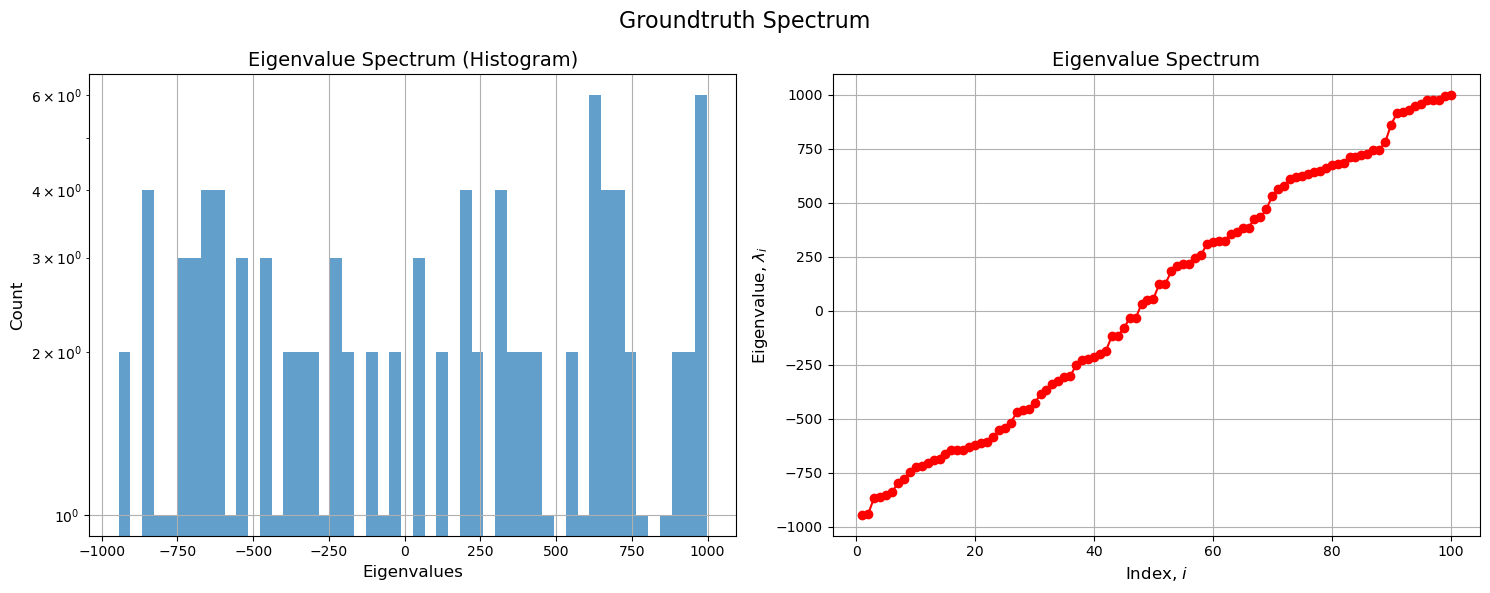

In [5]:
torch.manual_seed(1)
num_bins = 50 # number of bins for the histograms
dict_eigenvalues = {
	'num_around_zero': 100,
	'around_zero_low': -1e3,
	'around_zero_high': 1e3,
	'num_pos_extremes': 0,
	'pos_low': 0,
	'pos_high': 0,
	'num_neg_extremes': 0,
	'neg_low': 0,
	'neg_high': 0
}
eigenvalues = generate_eigenvalues(mtx_size, dict_eigenvalues)
plot_spectrum_combined(eigenvalues.numpy(), num_bins=num_bins, title='Groundtruth Spectrum')

#### Matrix computation module

In [6]:
mtx = matrix(eigenvalues)

#### Sanity check

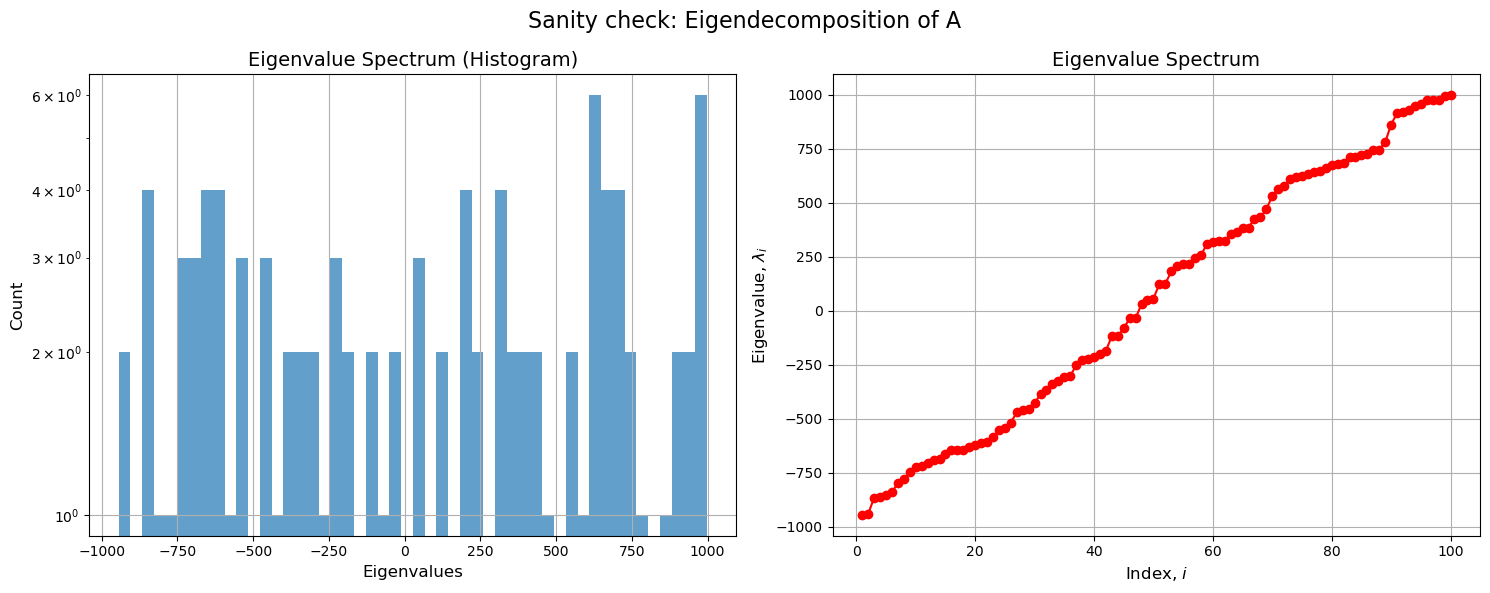

L2 distance: 0.007977967150509357


In [7]:
A = mtx.get_matrix() # form matrix from eigenvalues and u_vectors
eigenvalues_A, _ = torch.linalg.eig(A)
eigenvalues_A = eigenvalues_A.real  # cast to real numbers
plot_spectrum_combined(eigenvalues_A.numpy(), num_bins=num_bins, title='Sanity check: Eigendecomposition of A') 
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, eigenvalues_A, 2)}")

#### Slow Lanczos algorithm (PyHessian version)

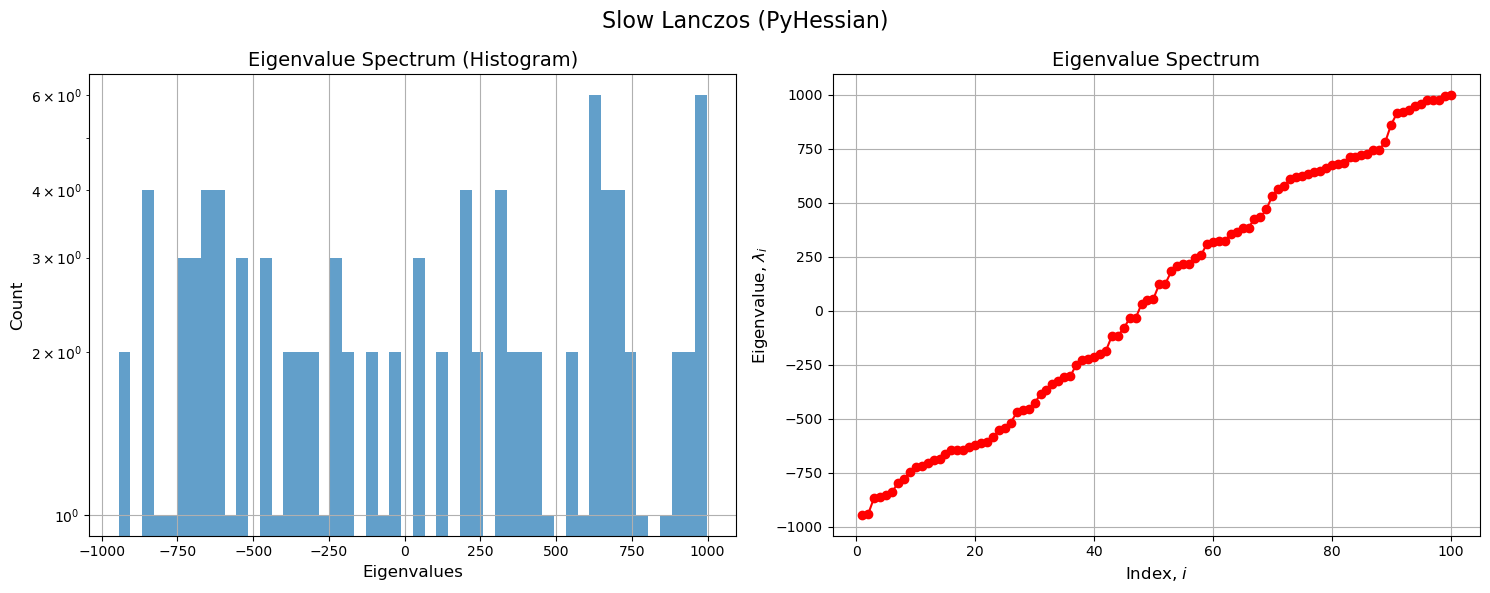

L2 distance: 0.006552197504788637


In [8]:
eigenvalues_slow_lanczos_pyhessian, _, alpha_slow_pyhessian, beta_slow_pyhessian = mtx.slow_lanczos_pyhessian(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_pyhessian, num_bins=num_bins, title='Slow Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2)}")

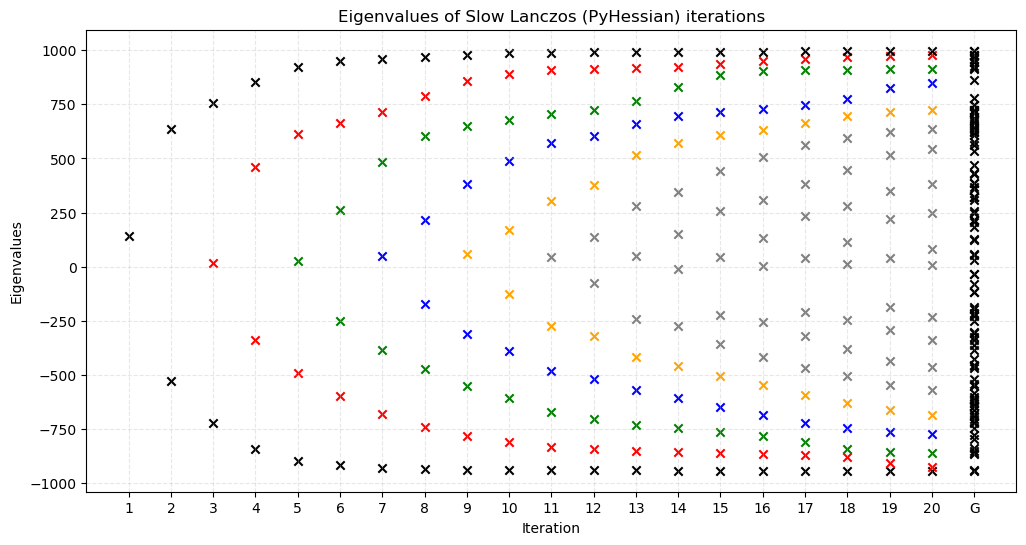

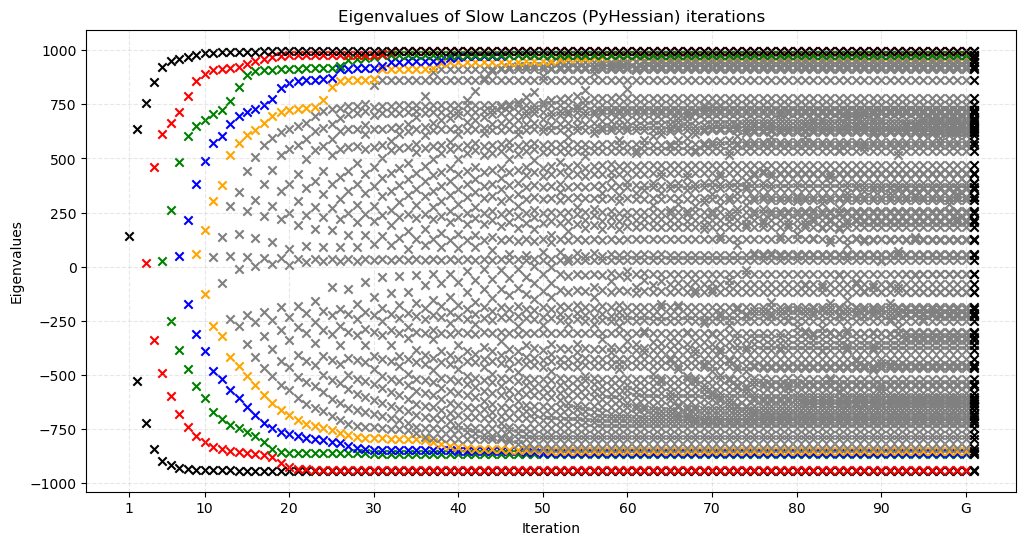

In [9]:
eigenvalues_slow_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")
eigenvalues_slow_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")

#### Slow Lanczos algorithm (Papyan's version)

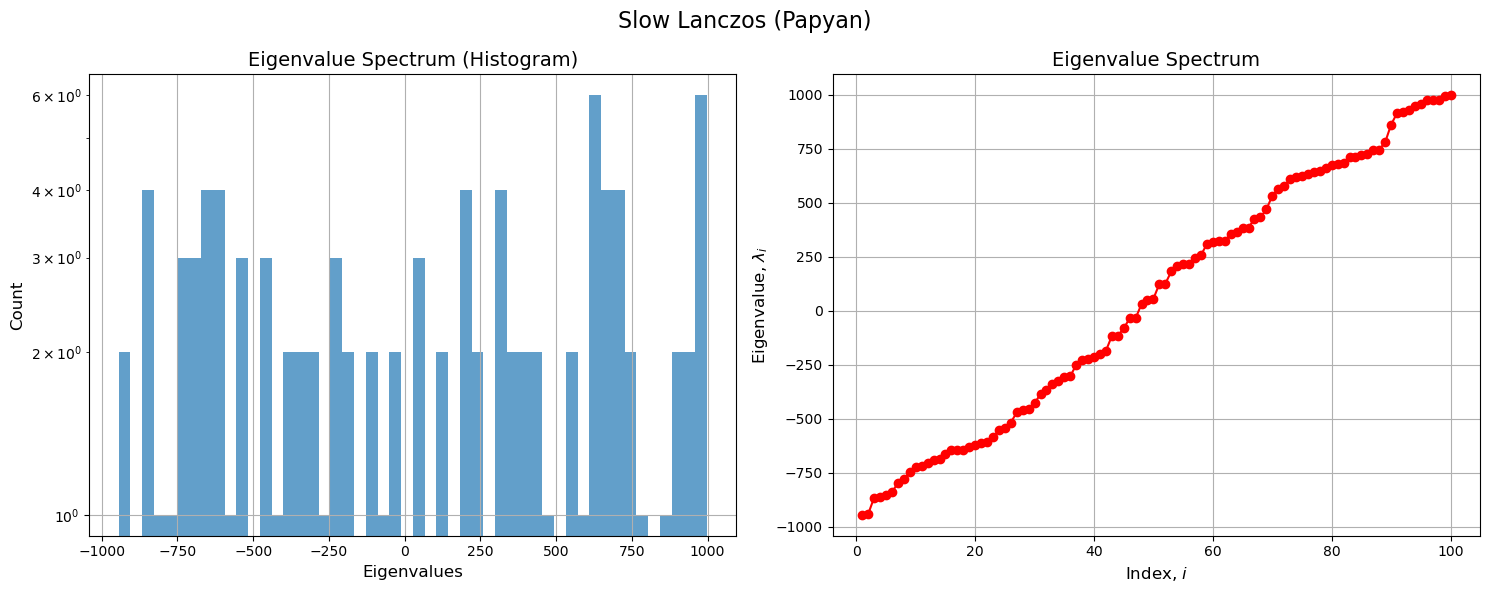

L2 distance: 0.006917474791407585


In [10]:
eigenvalues_slow_lanczos_papyan, _, alpha_slow_papyan, beta_slow_papyan = mtx.slow_lanczos_papyan(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_papyan, num_bins=num_bins, title='Slow Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2)}")

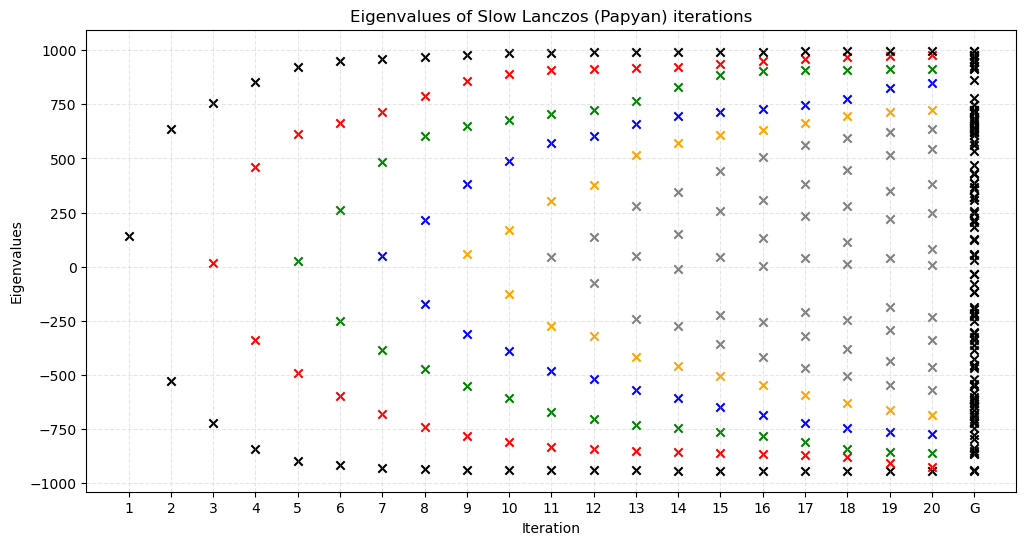

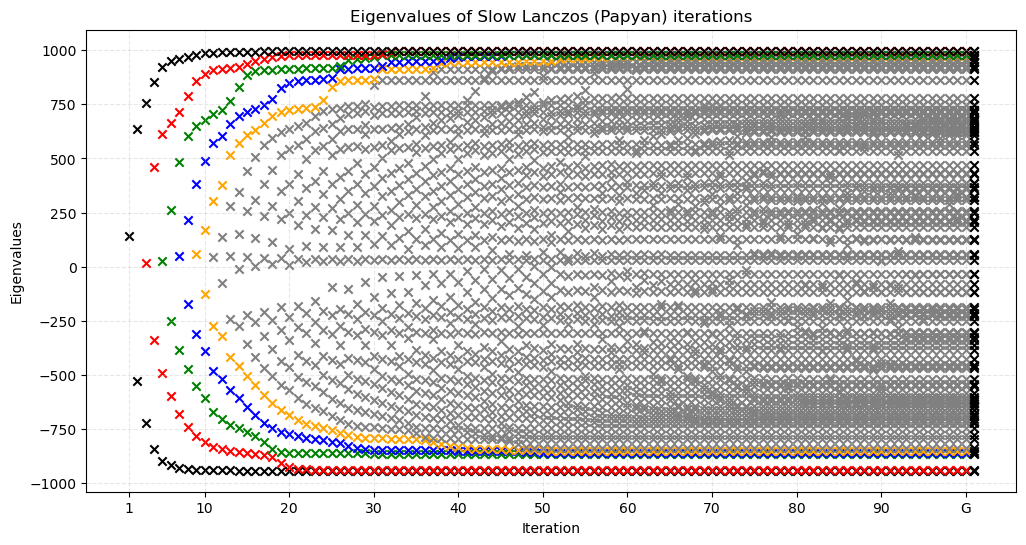

In [11]:
eigenvalues_slow_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")
eigenvalues_slow_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")

#### Slow Lanczos algorithm (Demmel's version)

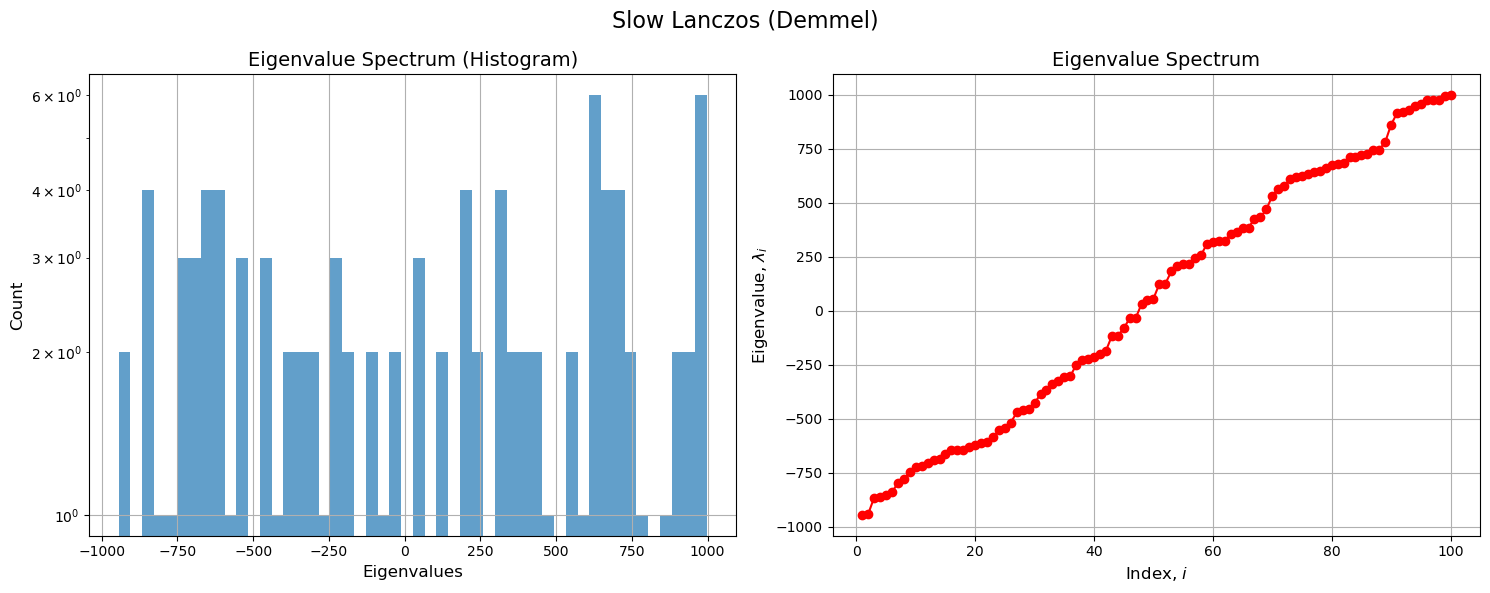

L2 distance: 0.006769112776964903


In [12]:
eigenvalues_slow_lanczos_demmel, _, alpha_slow_demmel, beta_slow_demmel = mtx.slow_lanczos_demmel(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_demmel, num_bins=num_bins, title='Slow Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2)}")

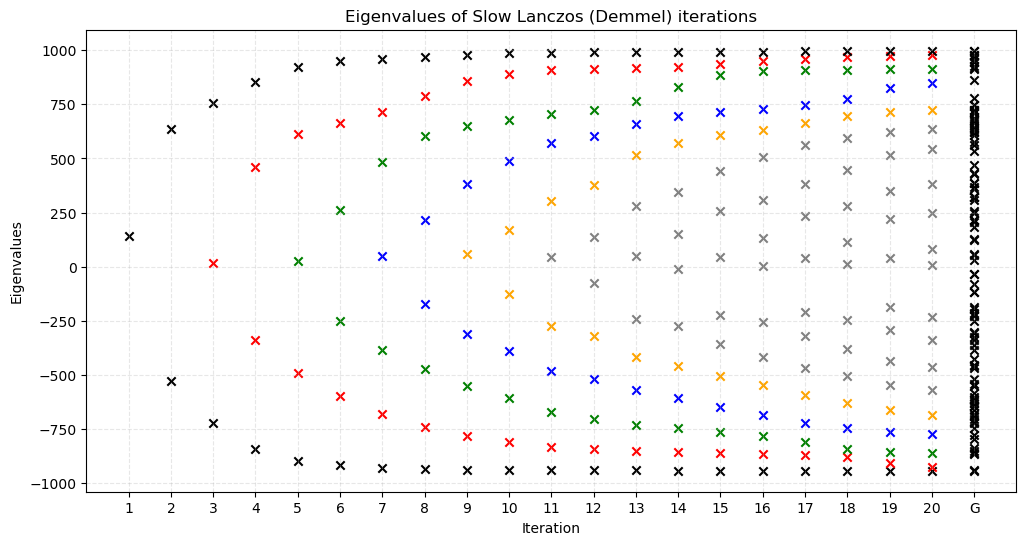

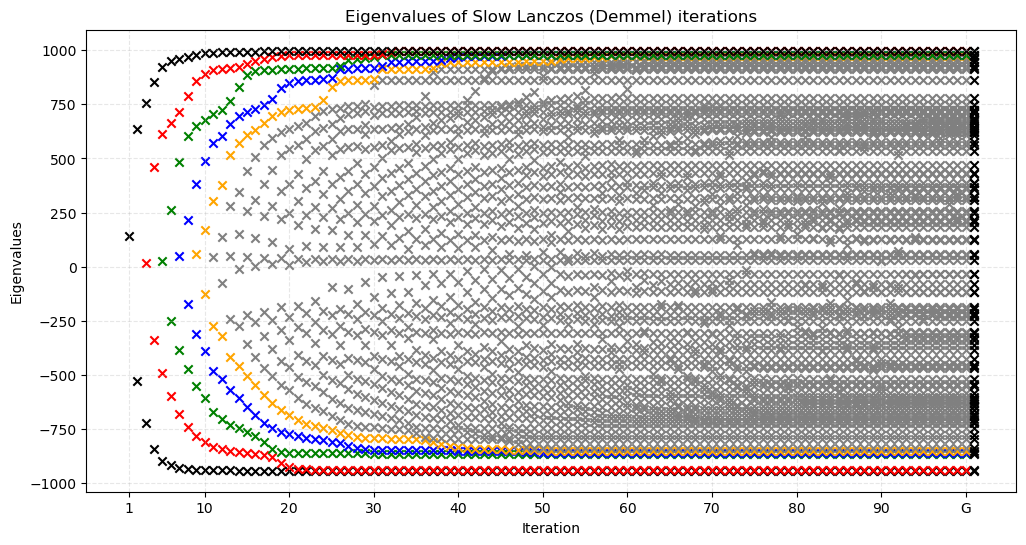

In [13]:
eigenvalues_slow_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")
eigenvalues_slow_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")

#### Fast Lanczos algorithm (Papyan's version)

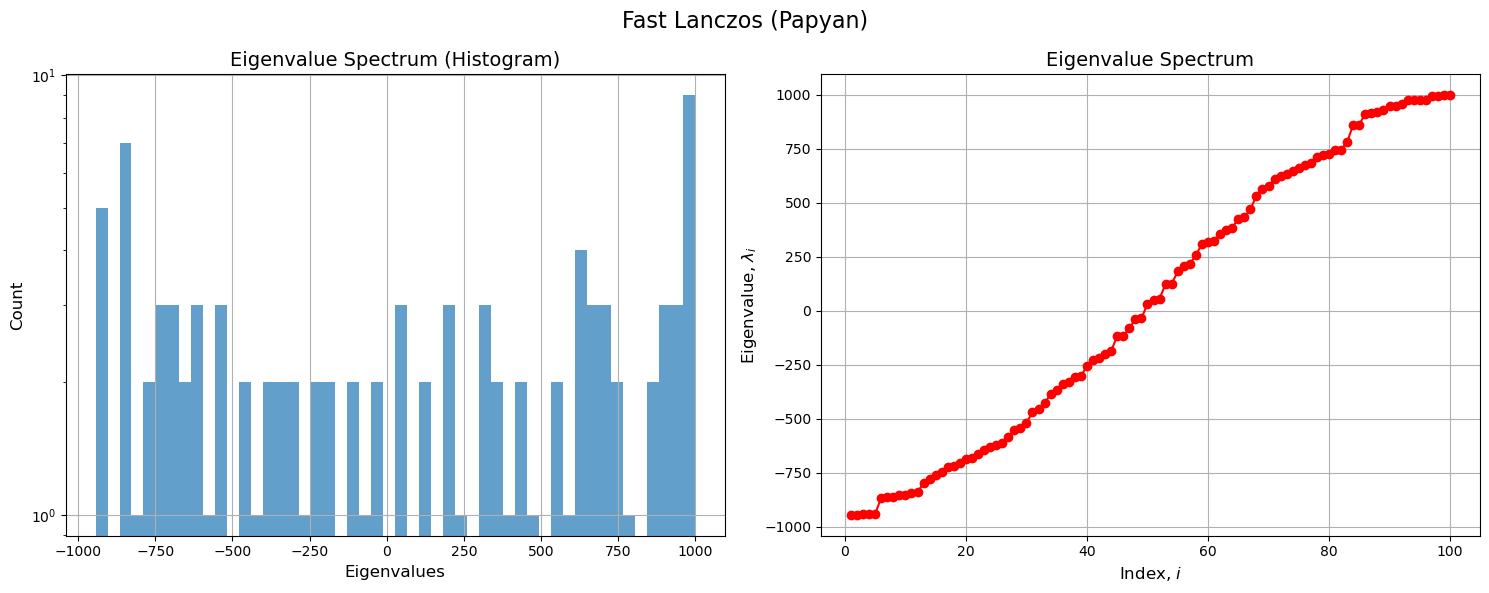

L2 distance: 754.9183349609375


In [14]:
eigenvalues_fast_lanczos_papyan, _, alpha_fast_papyan, beta_fast_papyan =  mtx.fast_lanczos_papyan(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_papyan, num_bins=num_bins, title='Fast Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2)}")

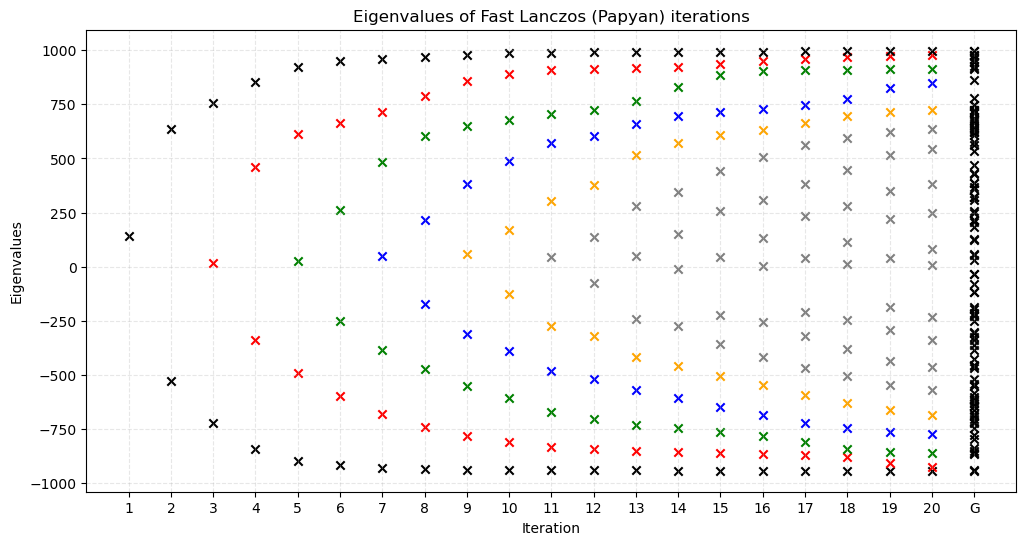

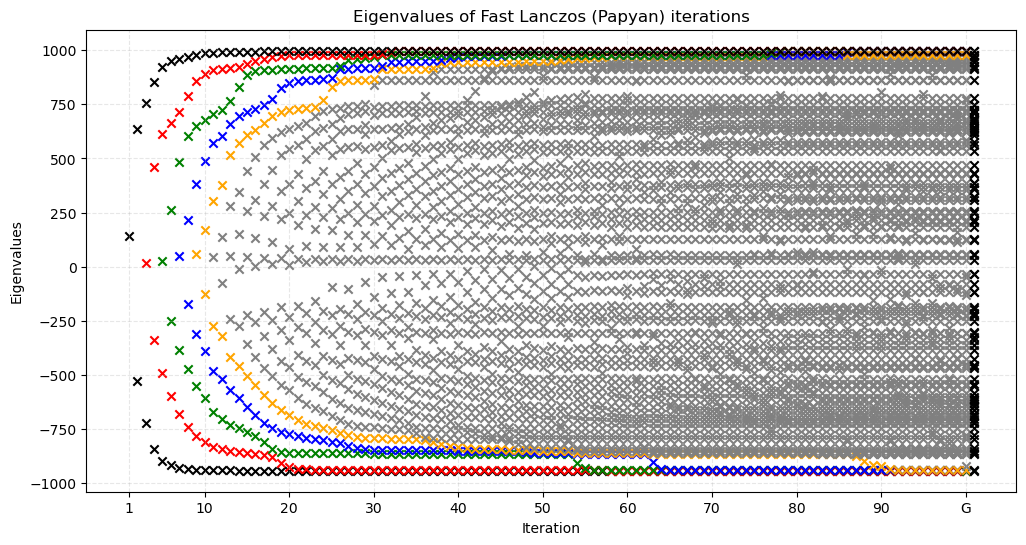

In [15]:
eigenvalues_fast_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")
eigenvalues_fast_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")

#### Fast Lanczos algorithm (Demmel's version)

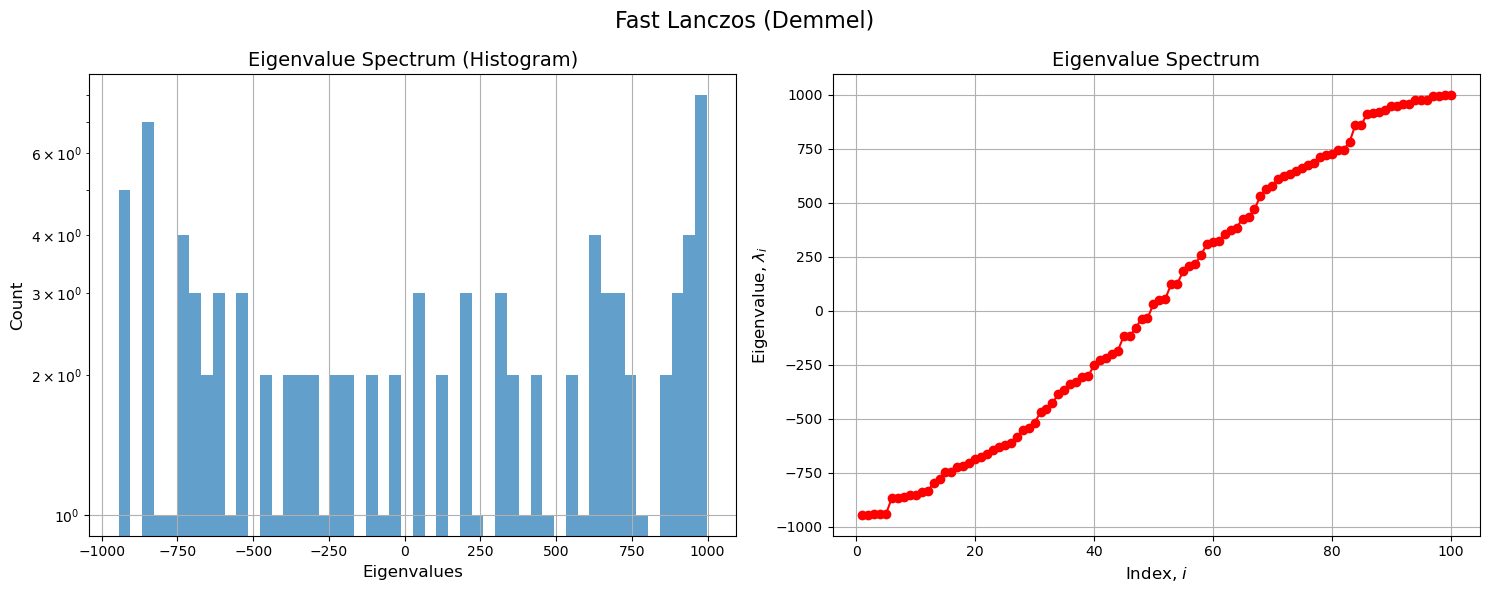

L2 distance: 749.6651611328125


In [16]:
eigenvalues_fast_lanczos_demmel, _, alpha_fast_demmel, beta_fast_demmel =  mtx.fast_lanczos_demmel(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_demmel, num_bins=num_bins, title='Fast Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2)}")

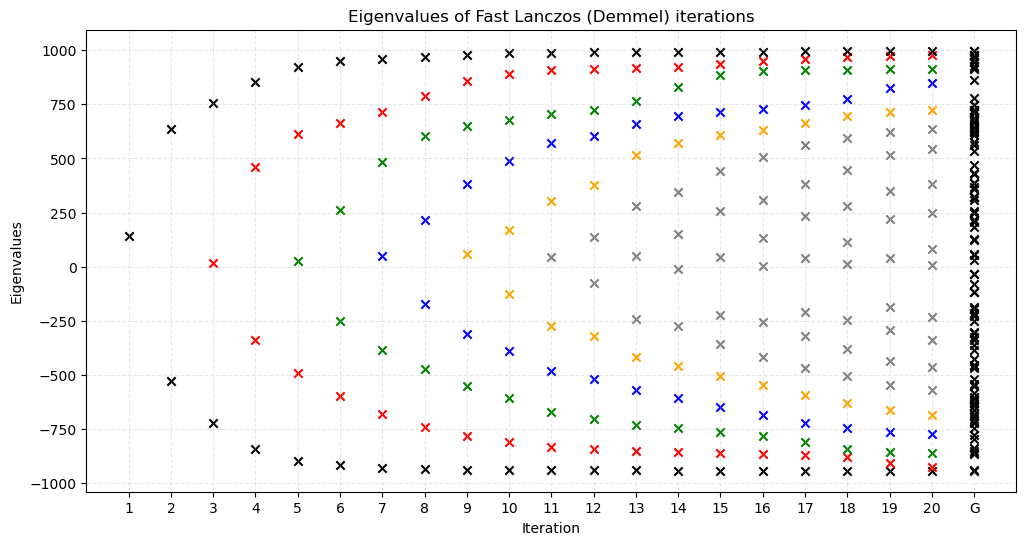

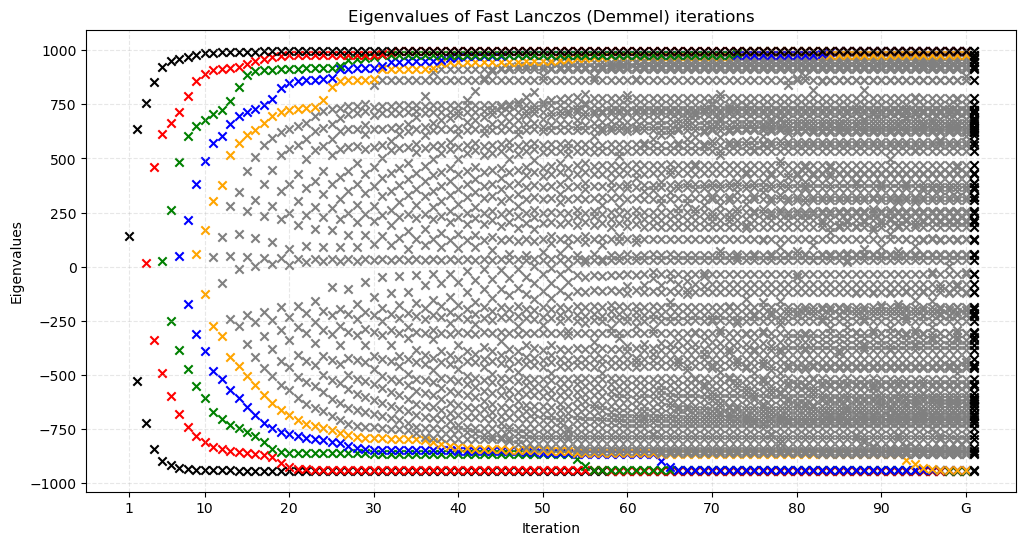

In [17]:
eigenvalues_fast_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")
eigenvalues_fast_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")

#### $d$-Lanczos (PyHessian's version)

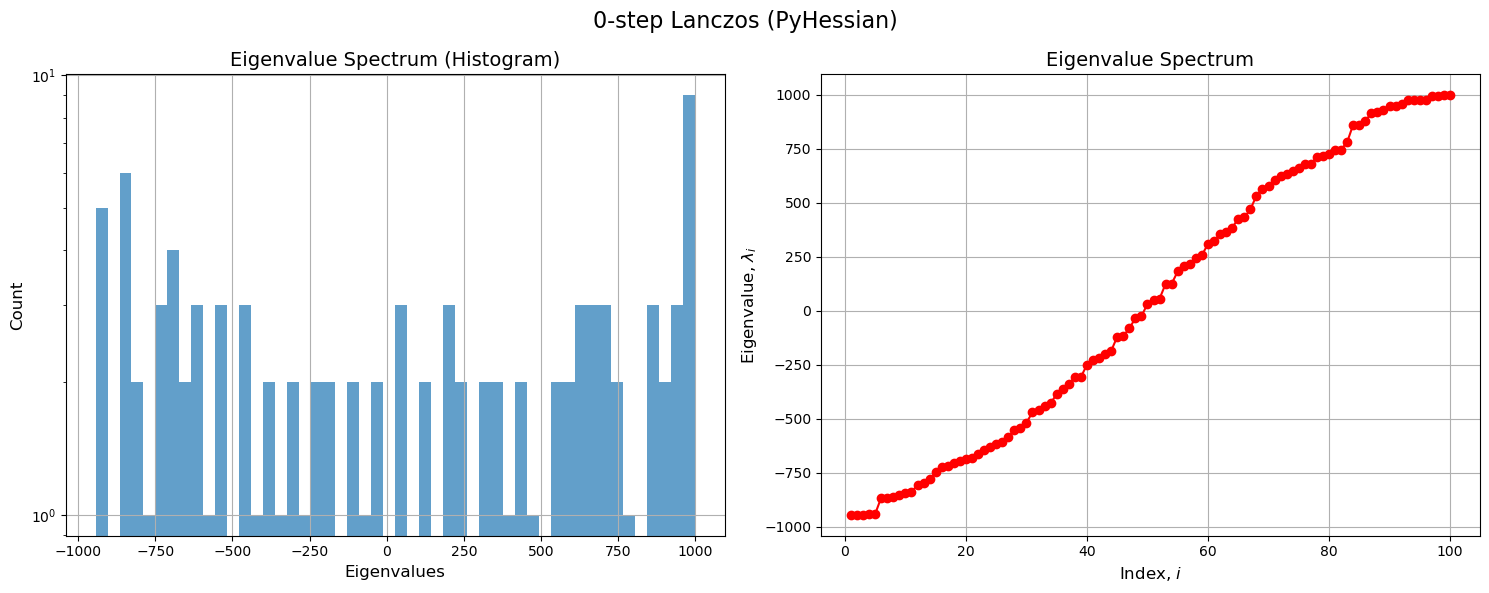

L2 distance: 742.13330078125


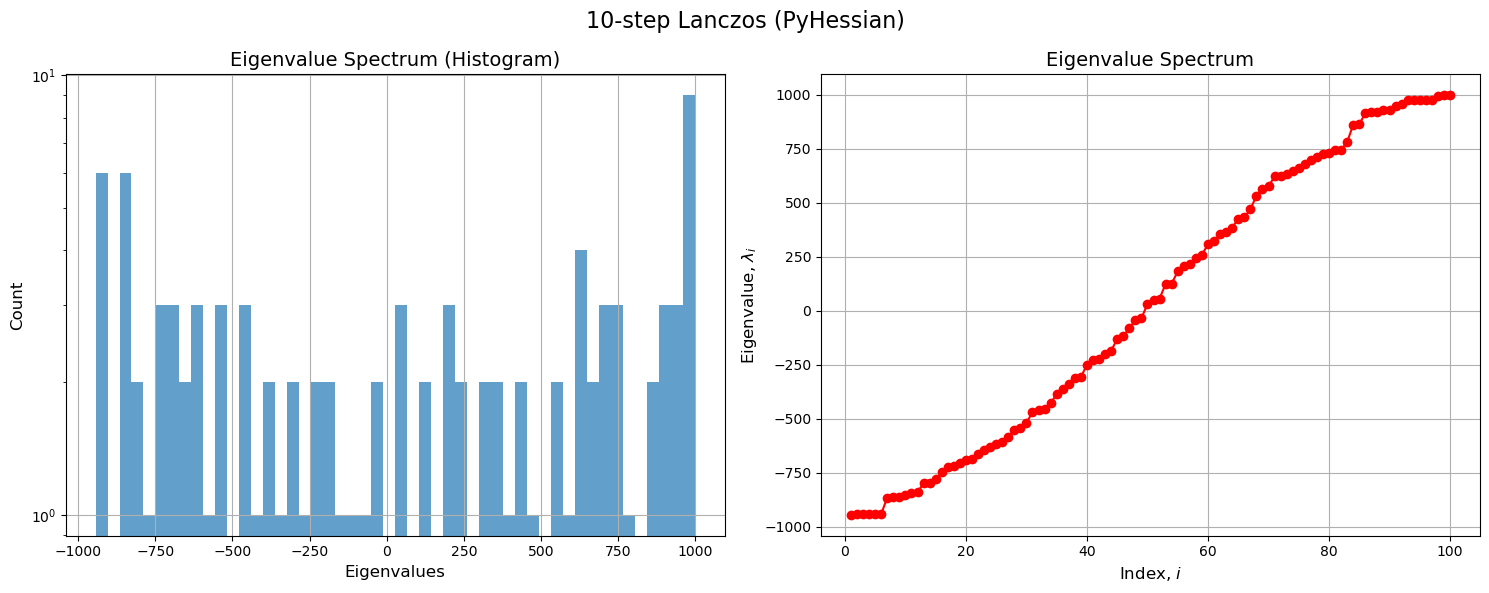

L2 distance: 784.8435668945312


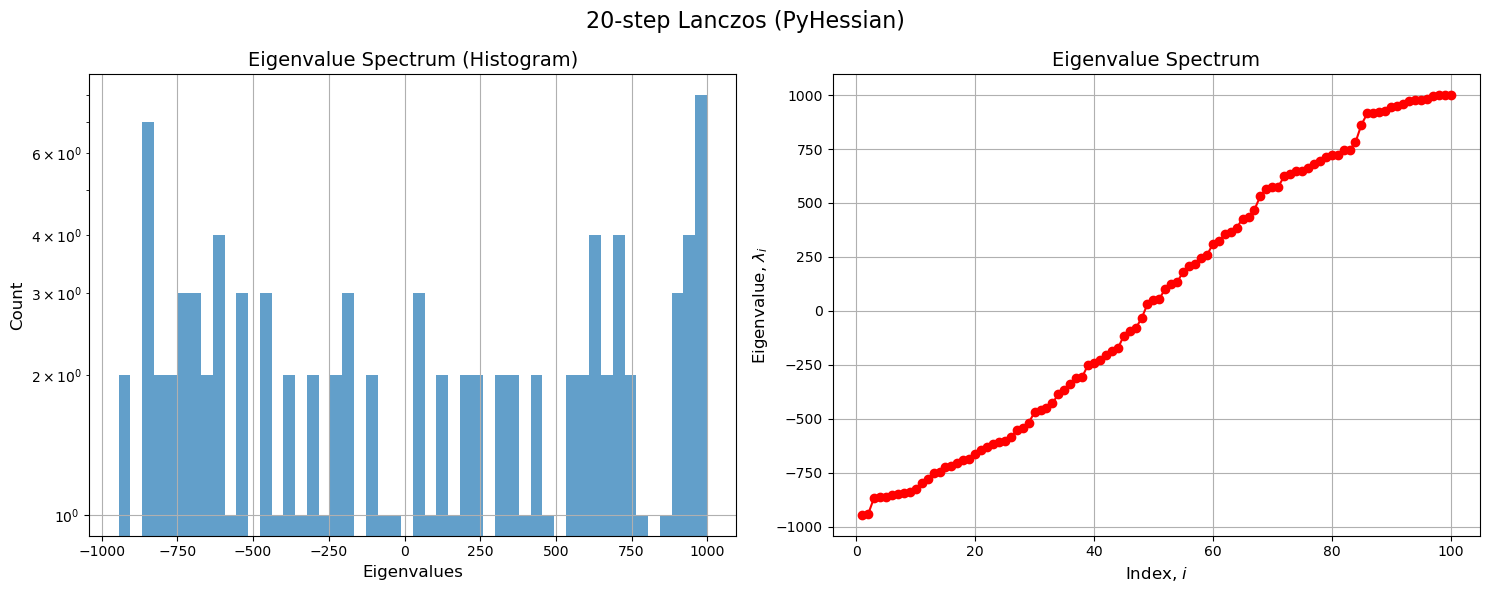

L2 distance: 617.59716796875


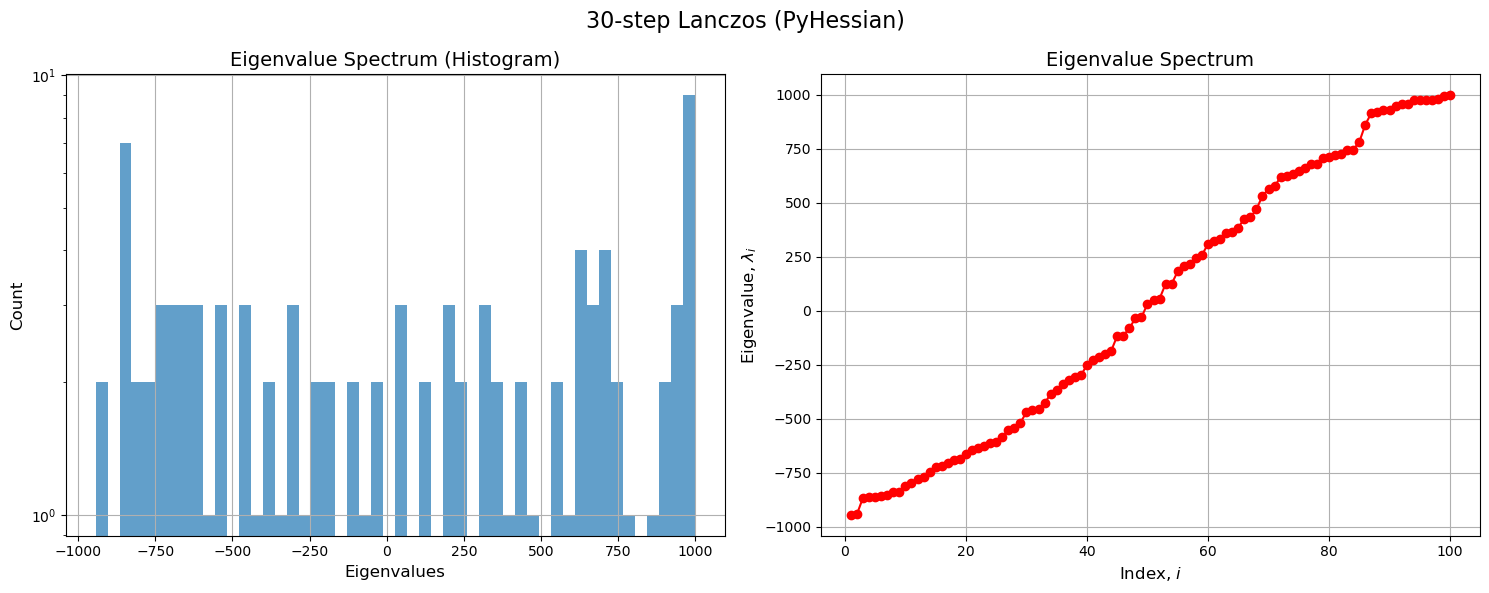

L2 distance: 585.3348388671875


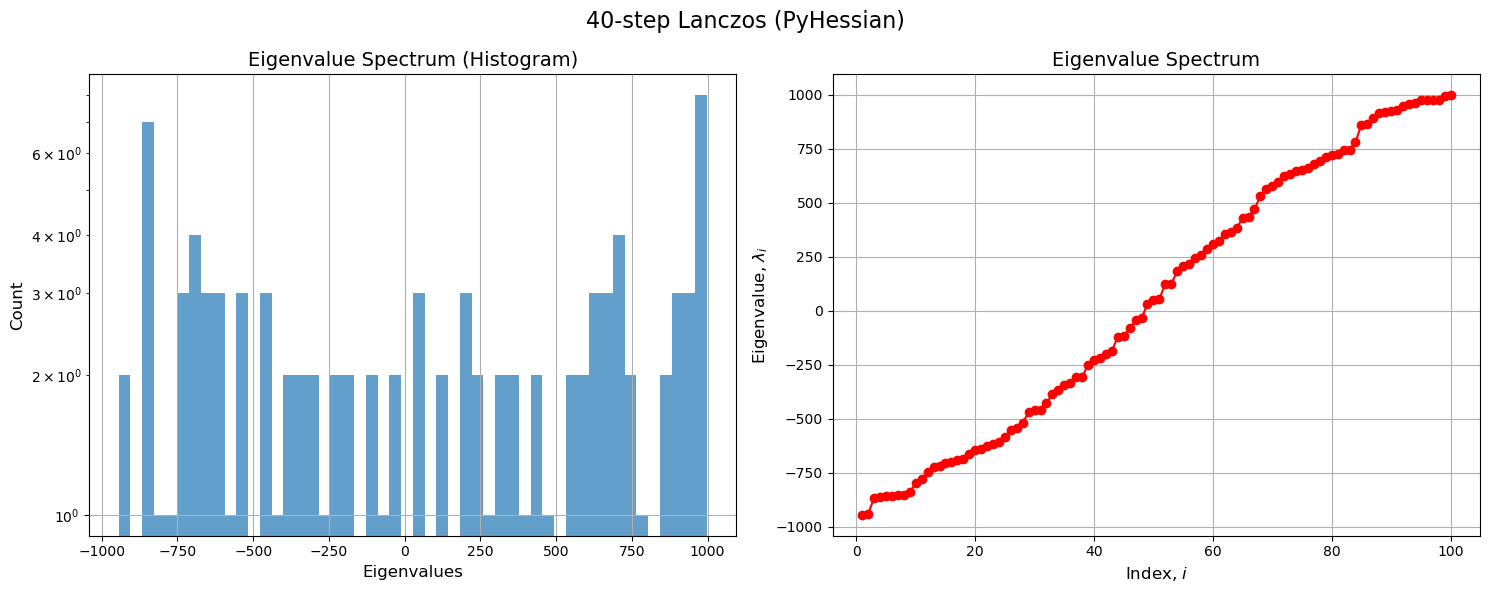

L2 distance: 523.7109985351562


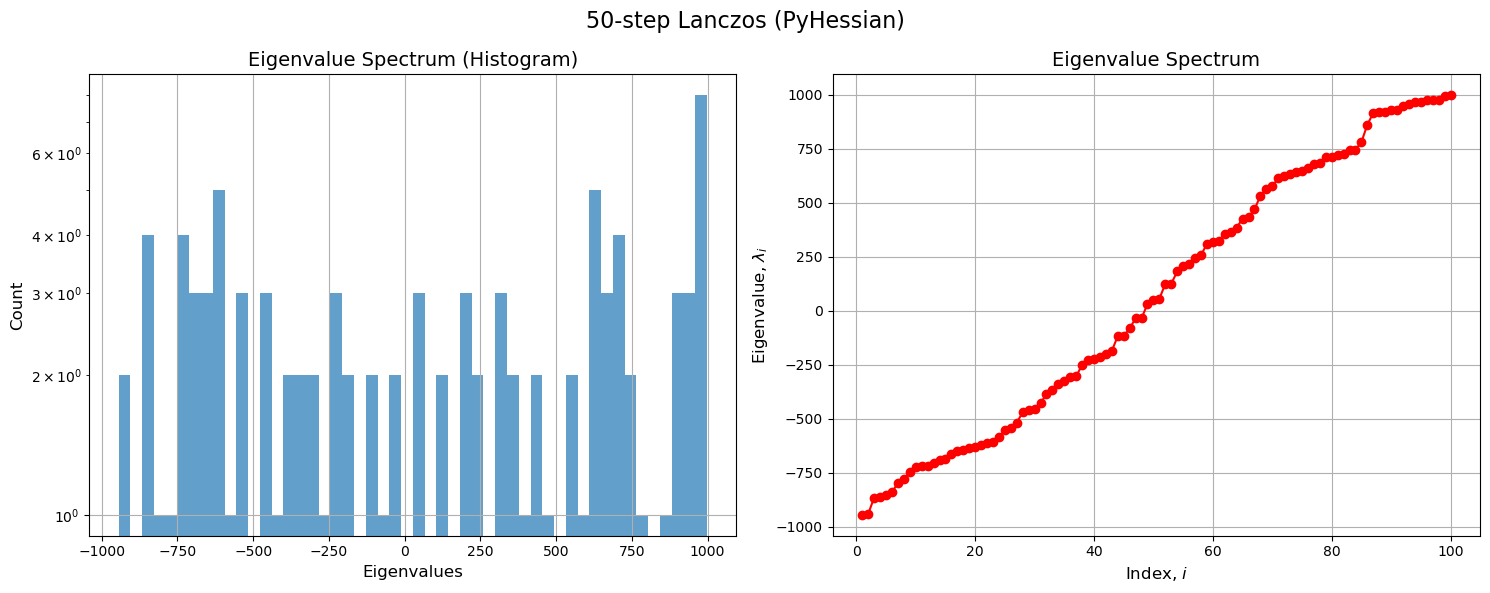

L2 distance: 436.27532958984375


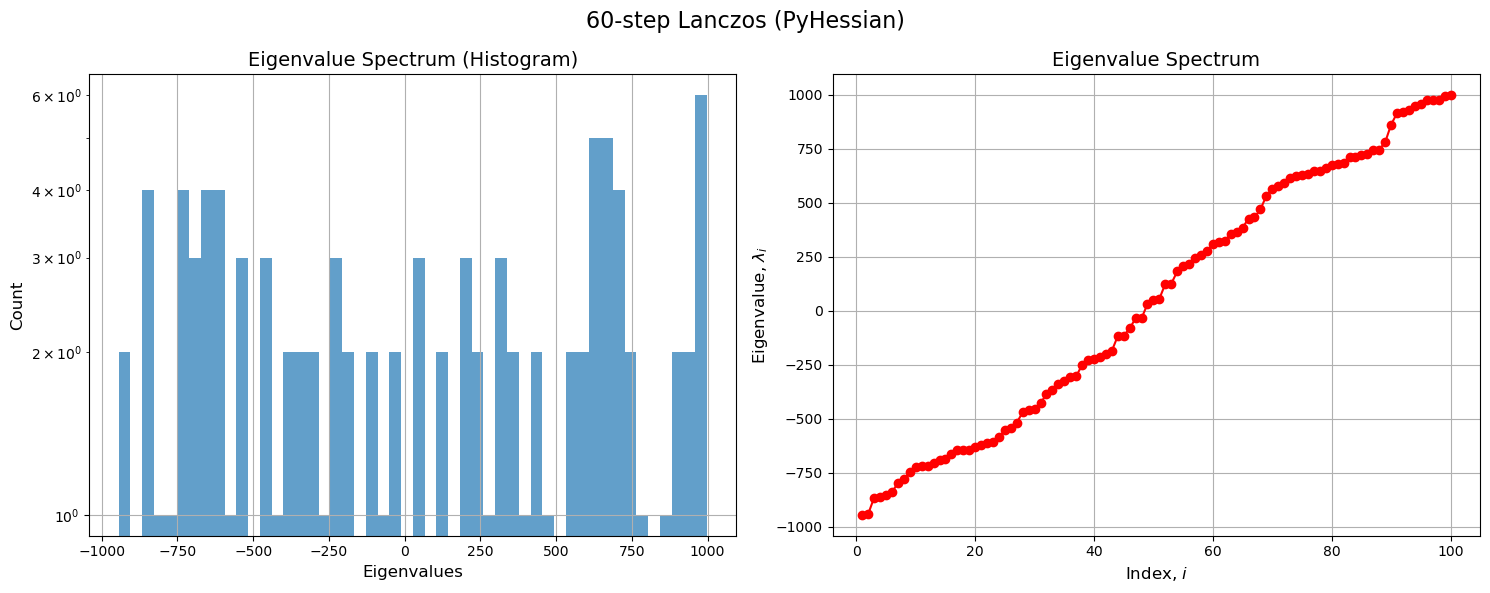

L2 distance: 213.20654296875


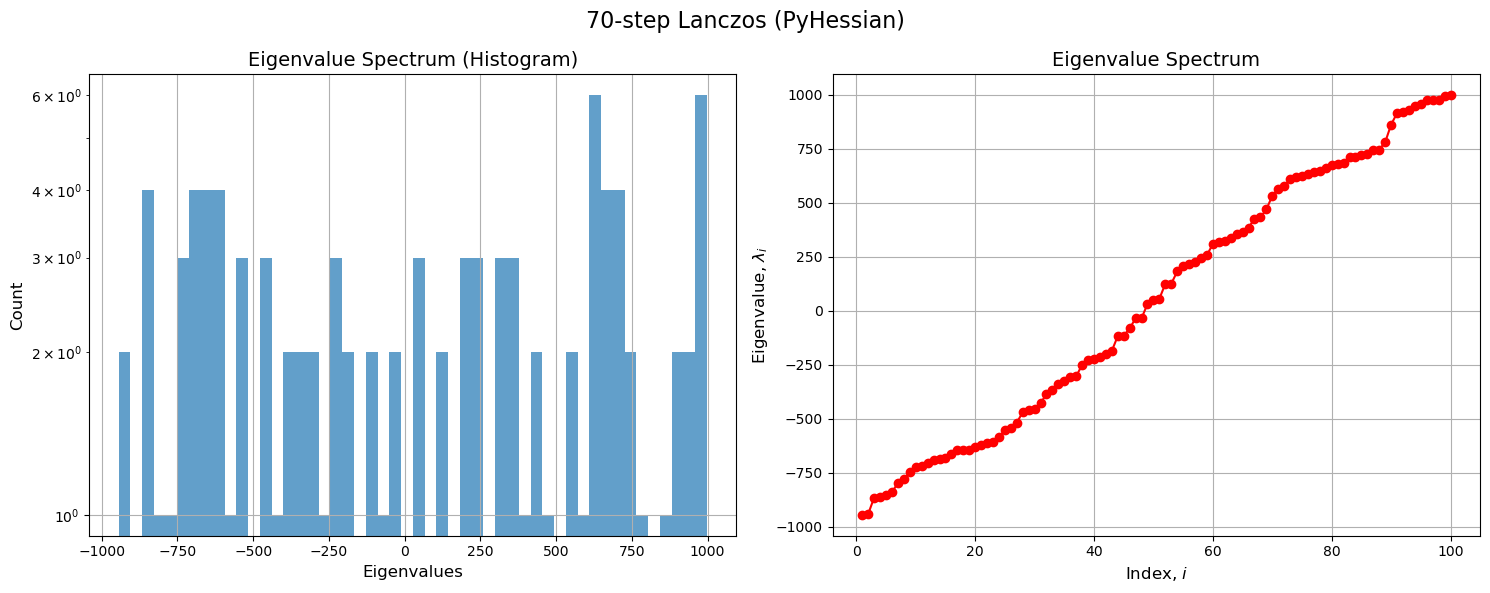

L2 distance: 197.6126251220703


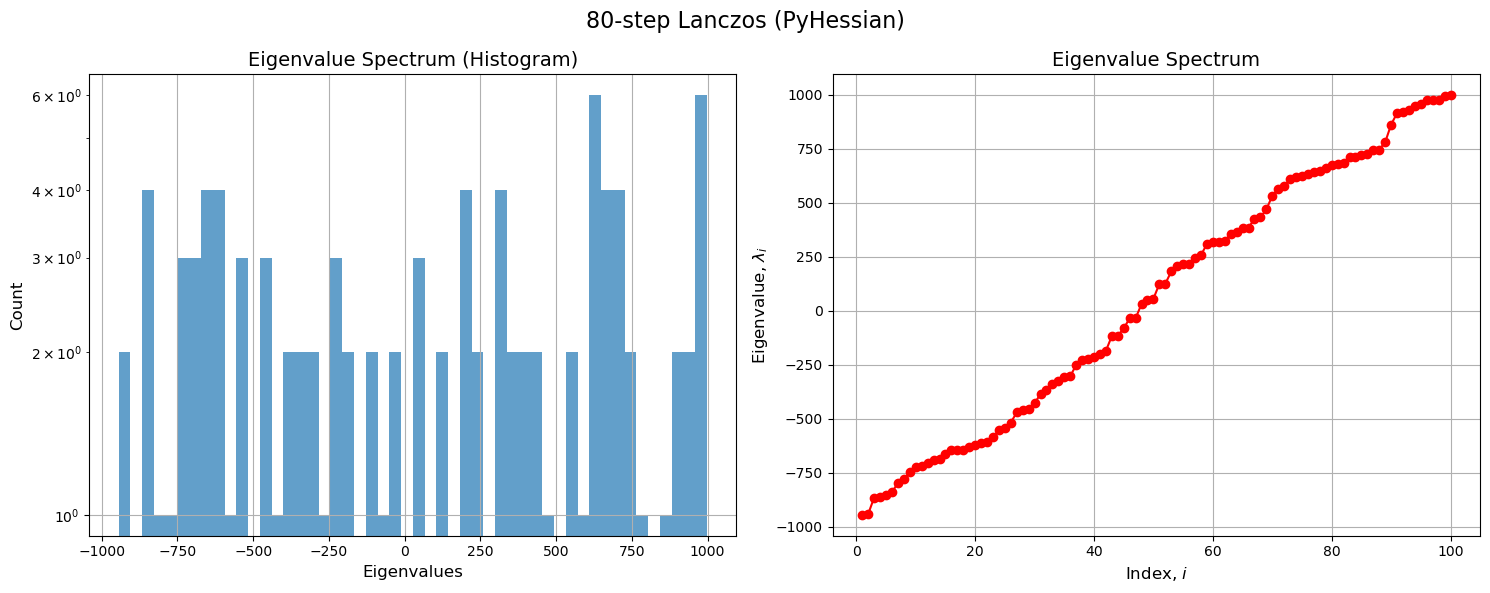

L2 distance: 1.584072232246399


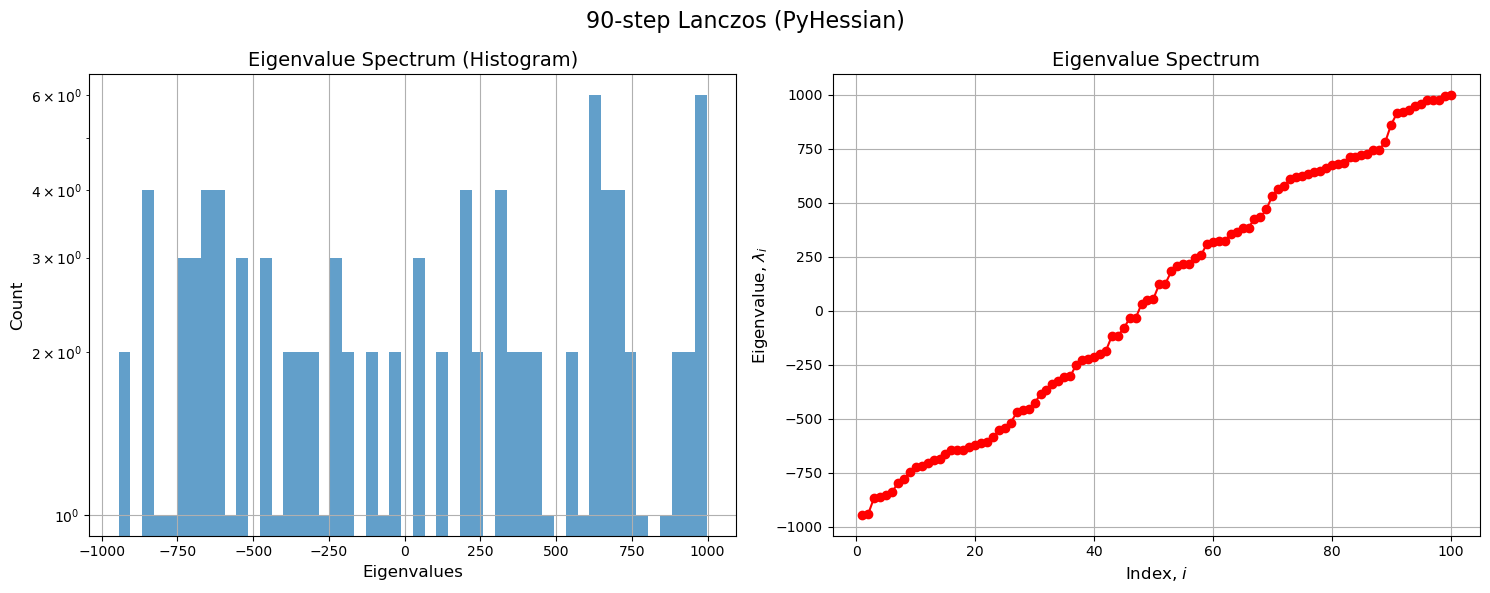

L2 distance: 0.008030097000300884


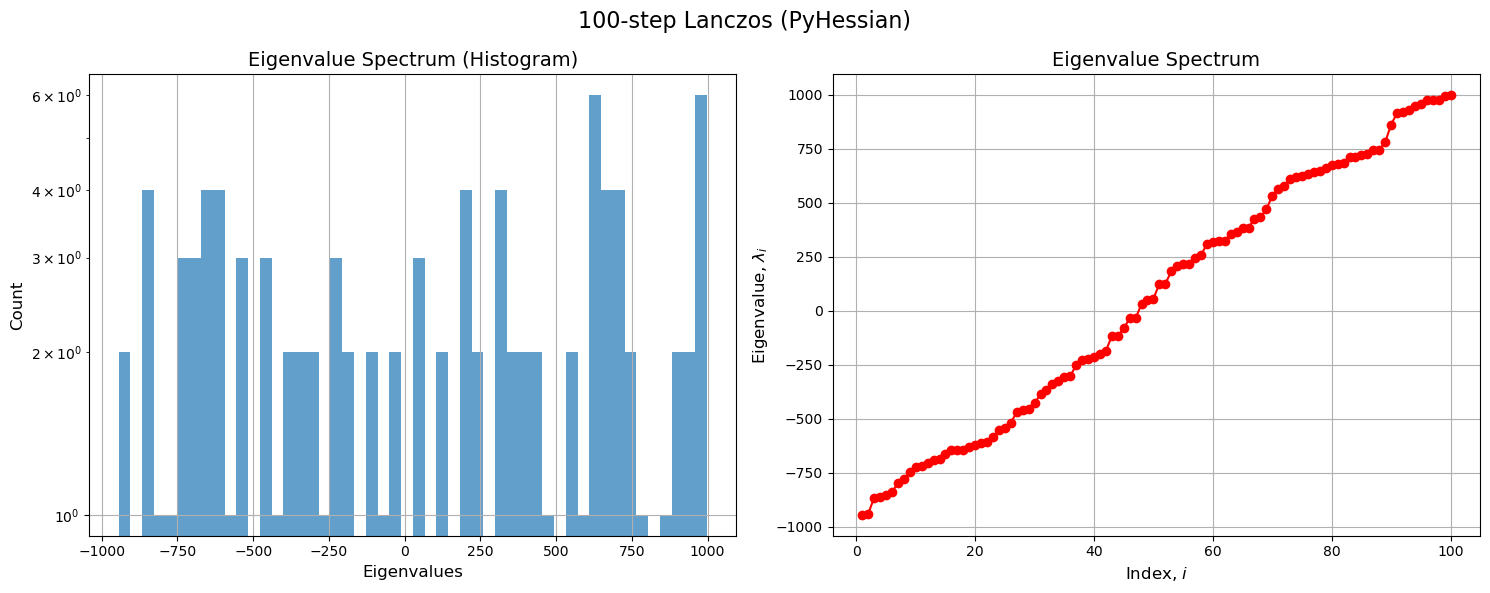

L2 distance: 0.006552197504788637


In [18]:
# find reasonable d for d-step Lanczos
for d in range(0, mtx_size+10, 10):
    eigenvalues_d_lanczos_pyhessian, _, _, _ = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=d)
    plot_spectrum_combined(eigenvalues_d_lanczos_pyhessian, num_bins=num_bins, title=f'{d}-step Lanczos (PyHessian)')
    print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanczos_pyhessian), 2)}")

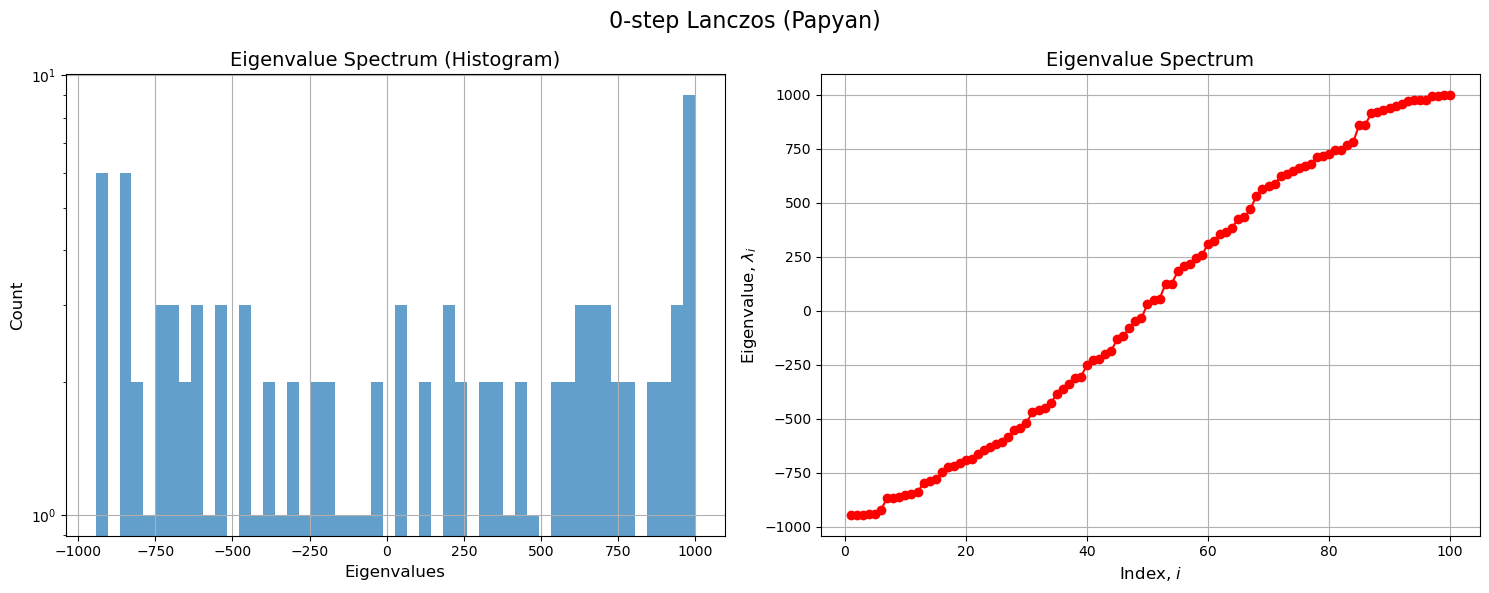

L2 distance: 753.883544921875


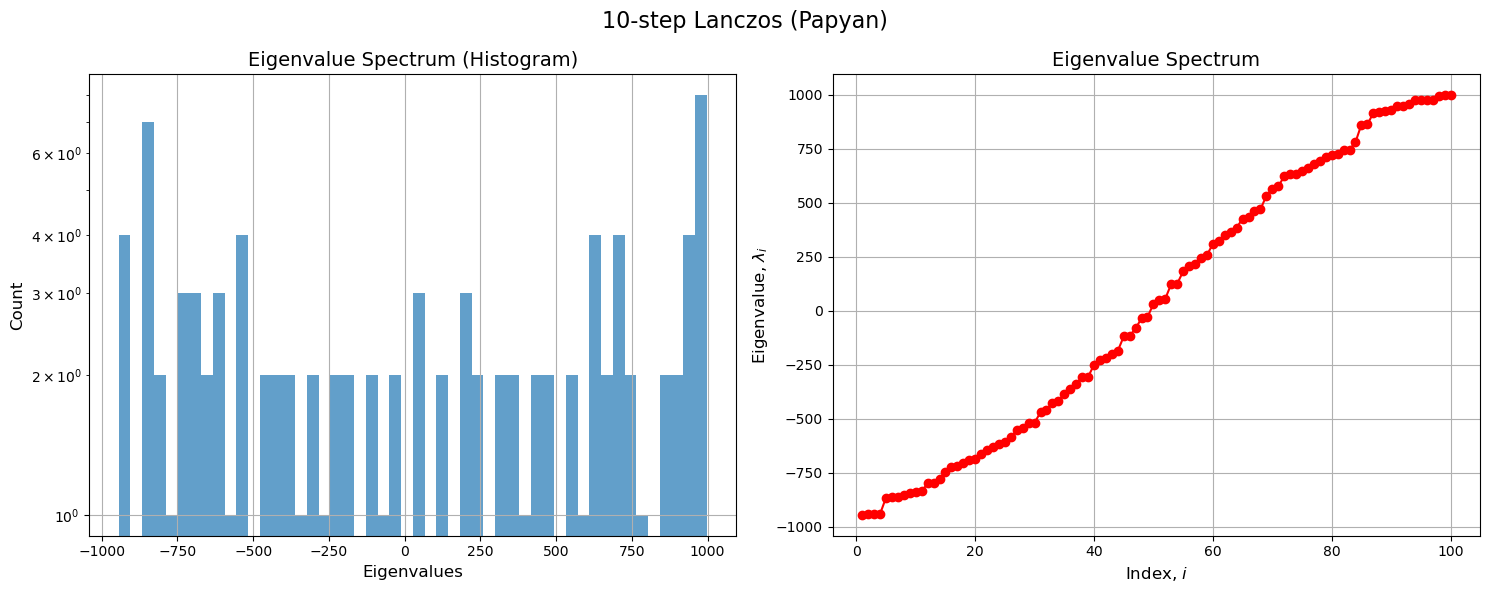

L2 distance: 670.4107666015625


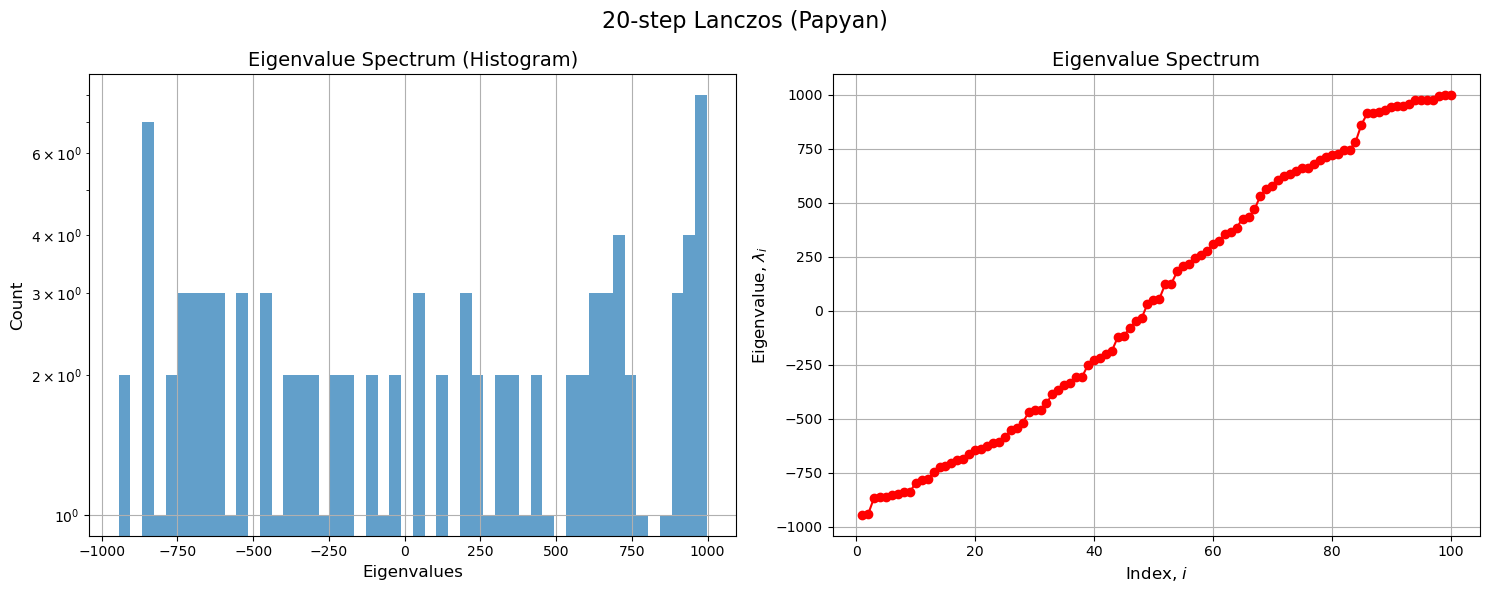

L2 distance: 561.5740356445312


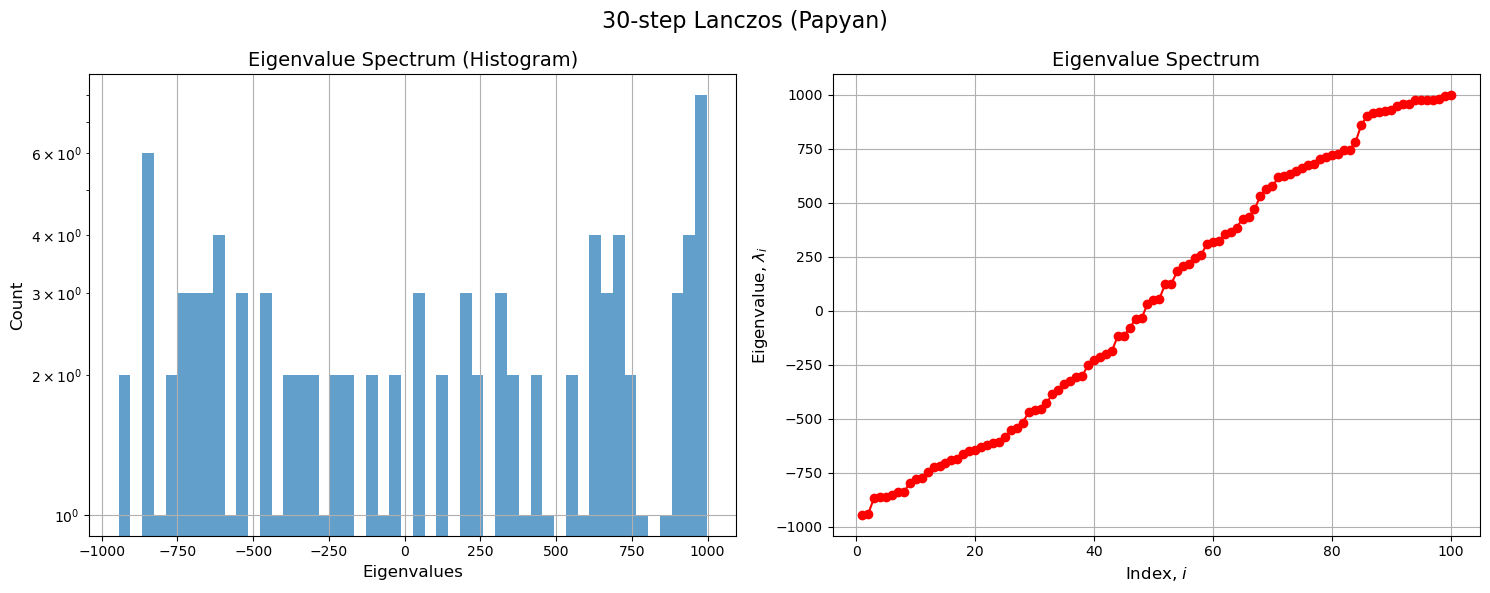

L2 distance: 534.2861938476562


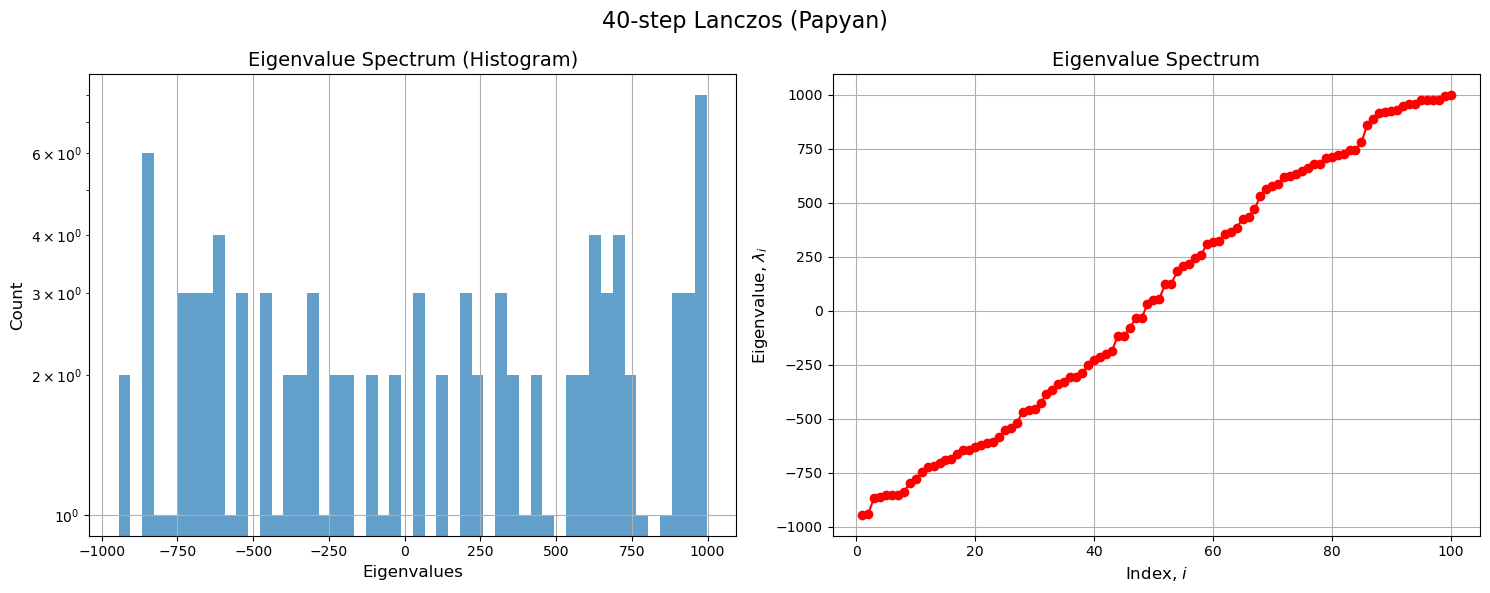

L2 distance: 444.1201477050781


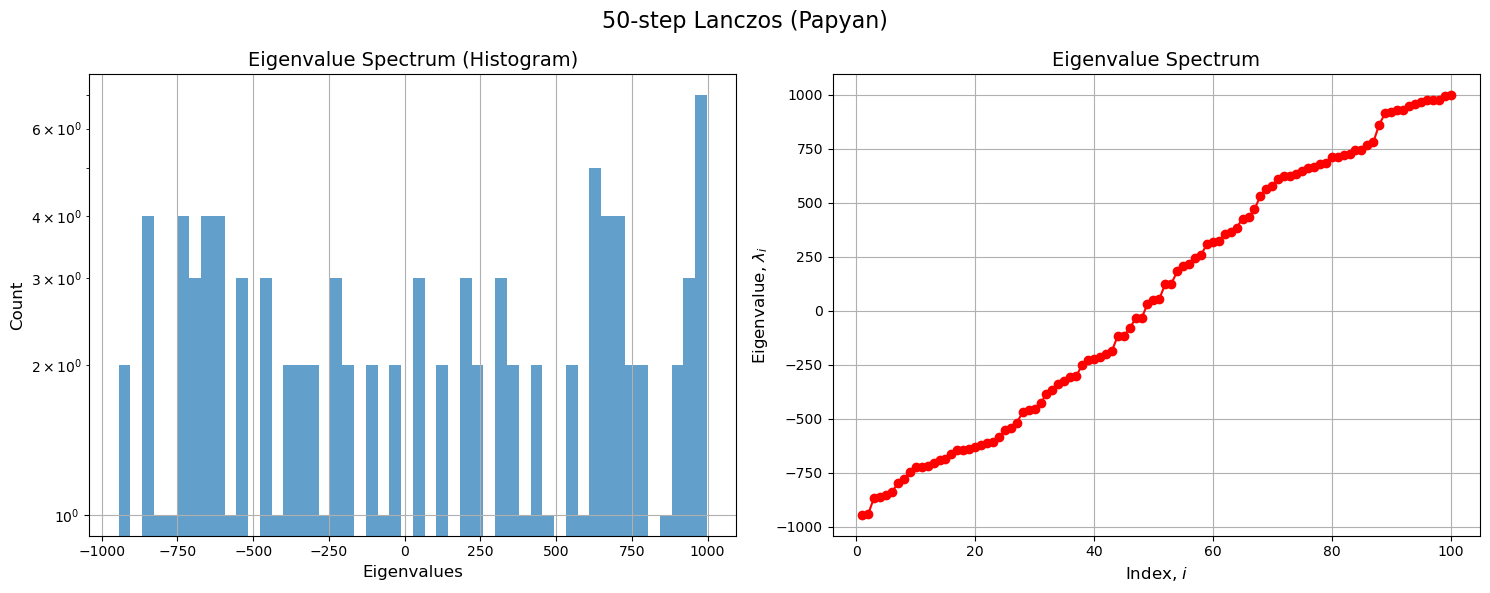

L2 distance: 341.8515930175781


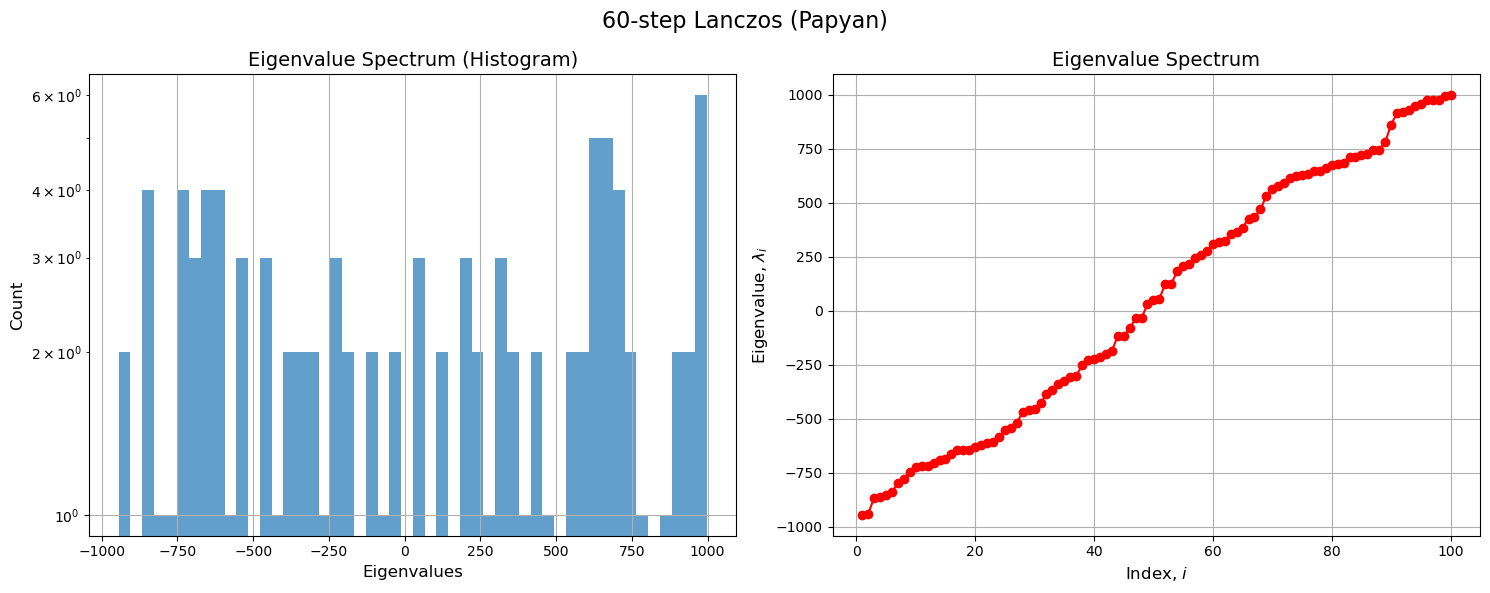

L2 distance: 213.12396240234375


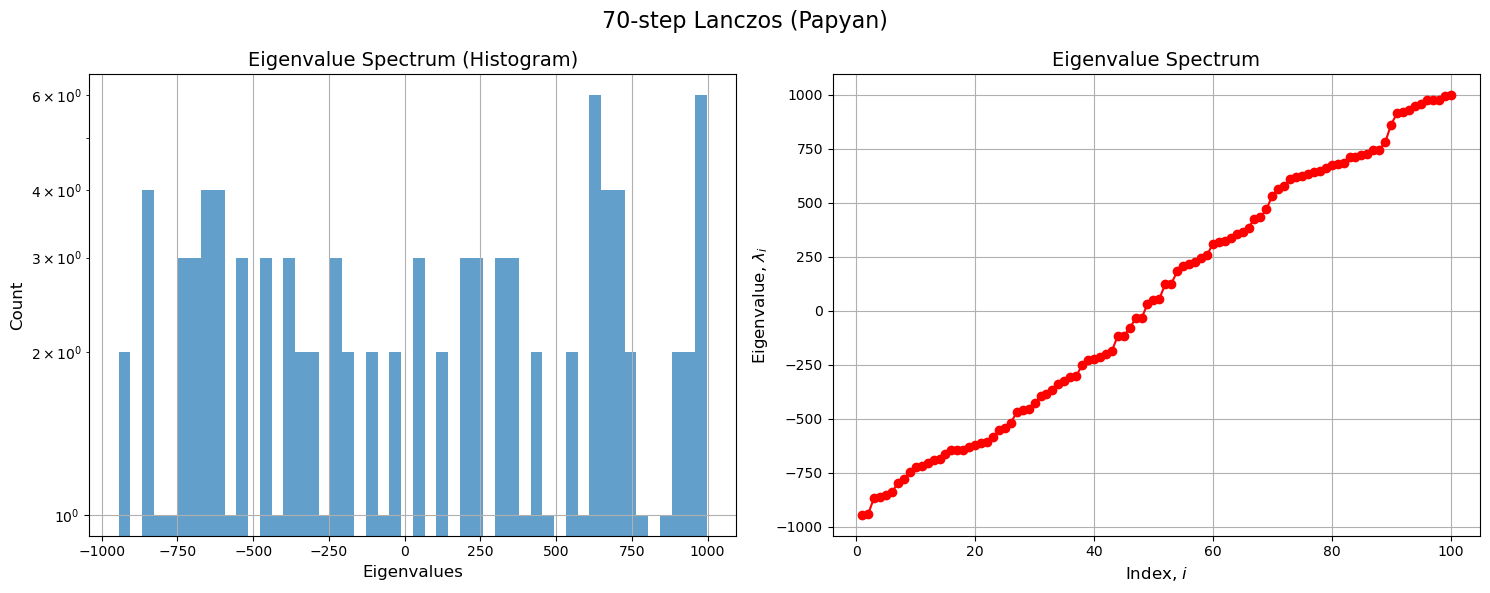

L2 distance: 176.54942321777344


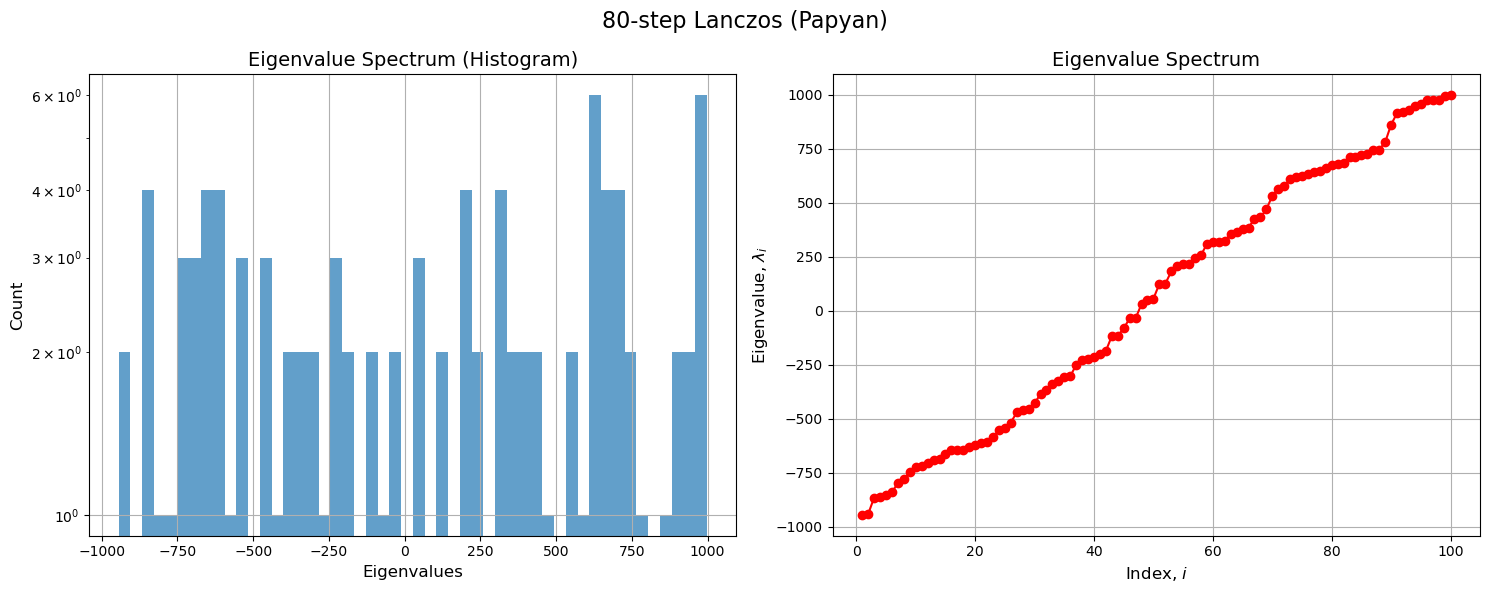

L2 distance: 3.0425755977630615


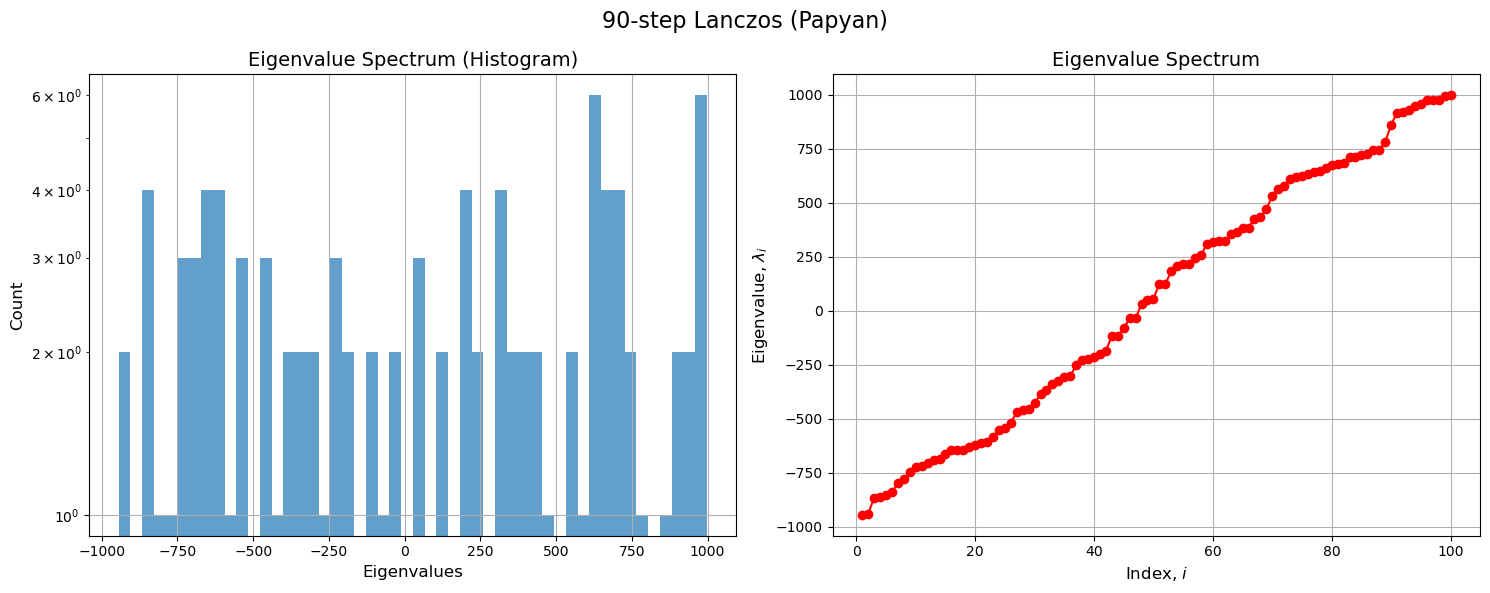

L2 distance: 0.012078787200152874


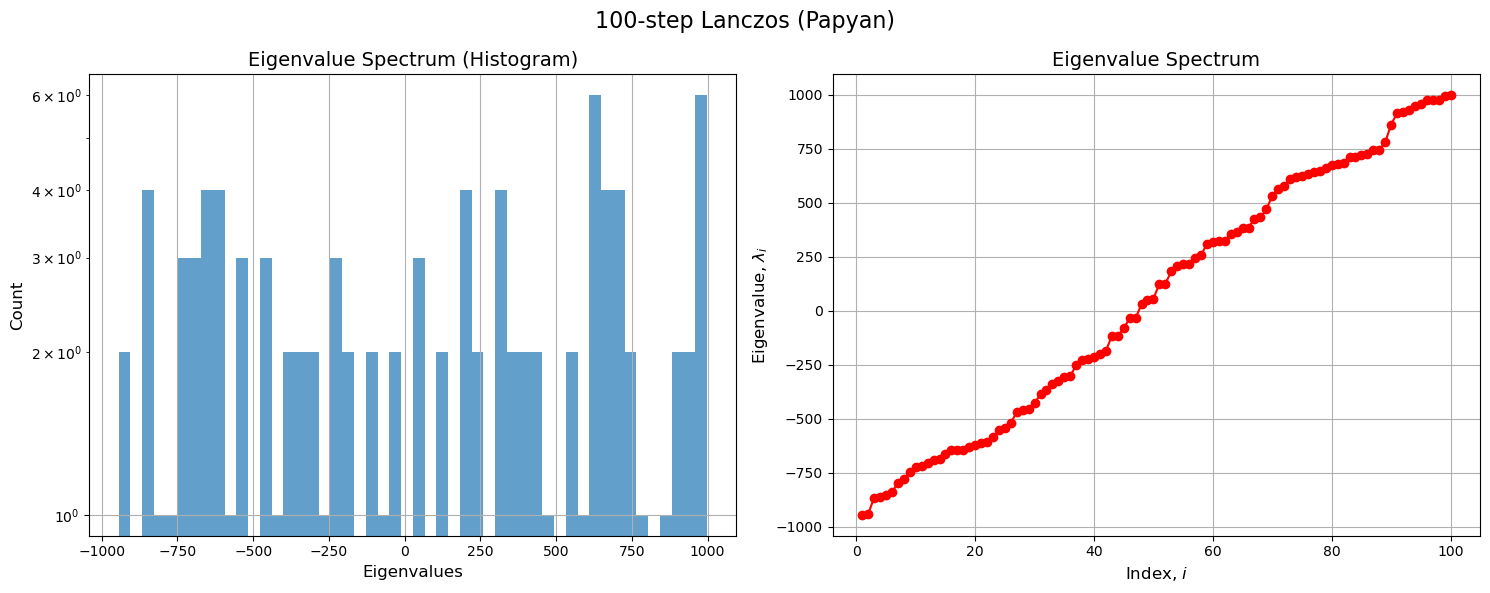

L2 distance: 0.006917474791407585


In [19]:
# find reasonable d for d-step Lanczos
for d in range(0, mtx_size+10, 10):
    eigenvalues_d_lanczos_papyan, _, _, _ = mtx.d_lanczos_papyan(mtx_size, seed=seed, d=d)
    plot_spectrum_combined(eigenvalues_d_lanczos_papyan, num_bins=num_bins, title=f'{d}-step Lanczos (Papyan)')
    print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanczos_papyan), 2)}")

#### 15-Lanczos (PyHessian's version)

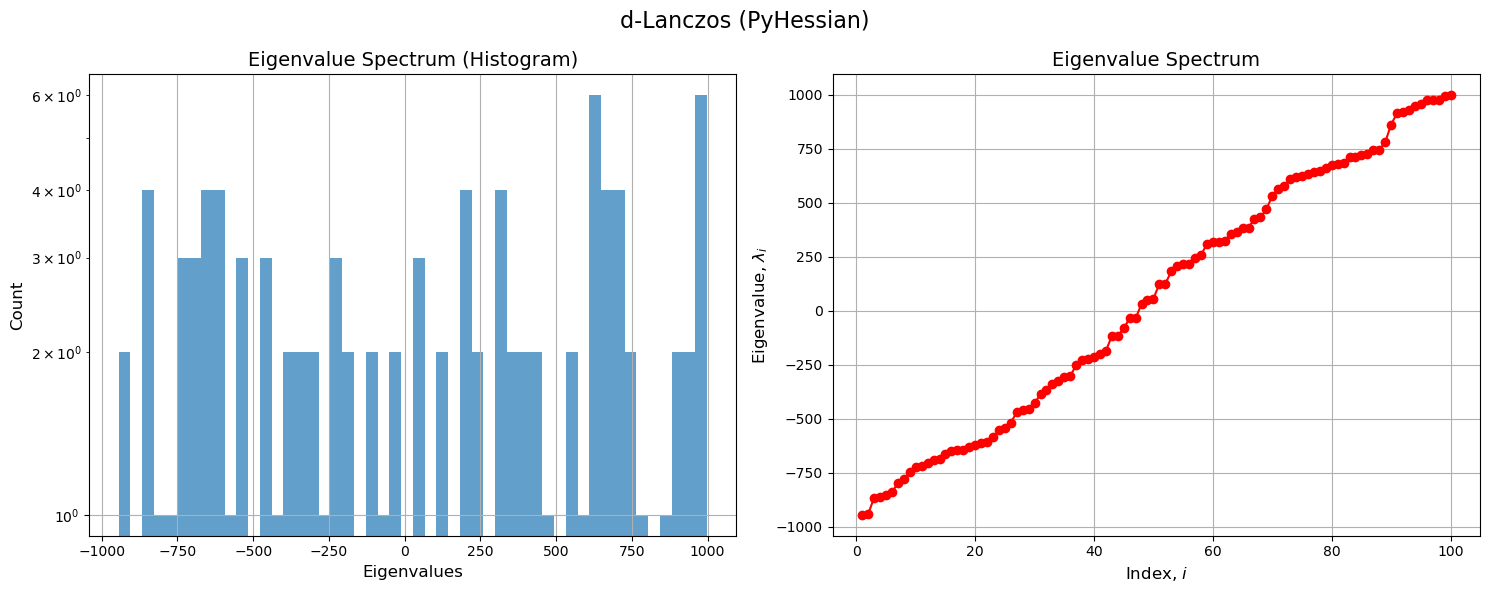

L2 distance: 2.4822816848754883


In [31]:
d_value_pyhessian = 75
eigenvalues_d_lanzcos_pyhessian, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=d_value_pyhessian)
plot_spectrum_combined(eigenvalues_d_lanzcos_pyhessian, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian), 2)}")

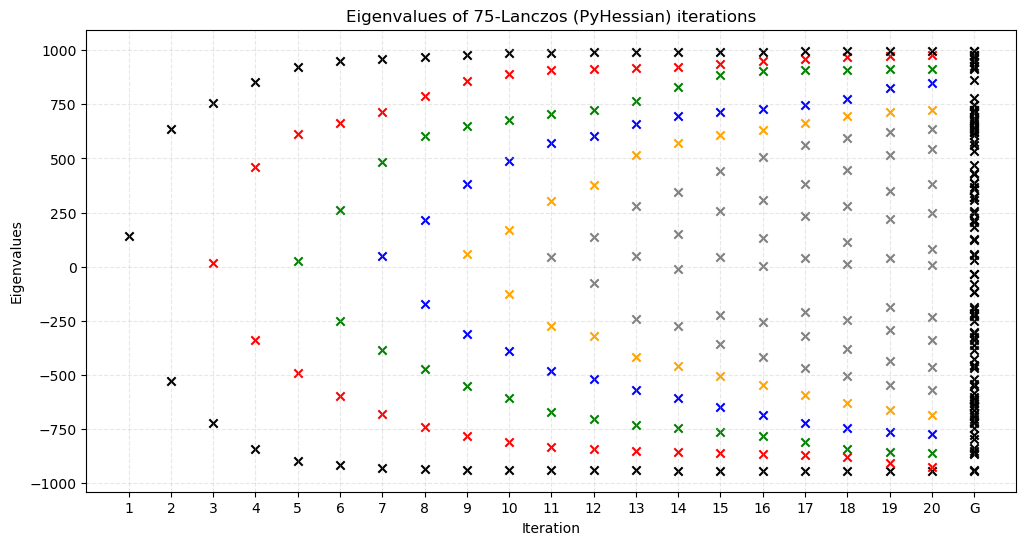

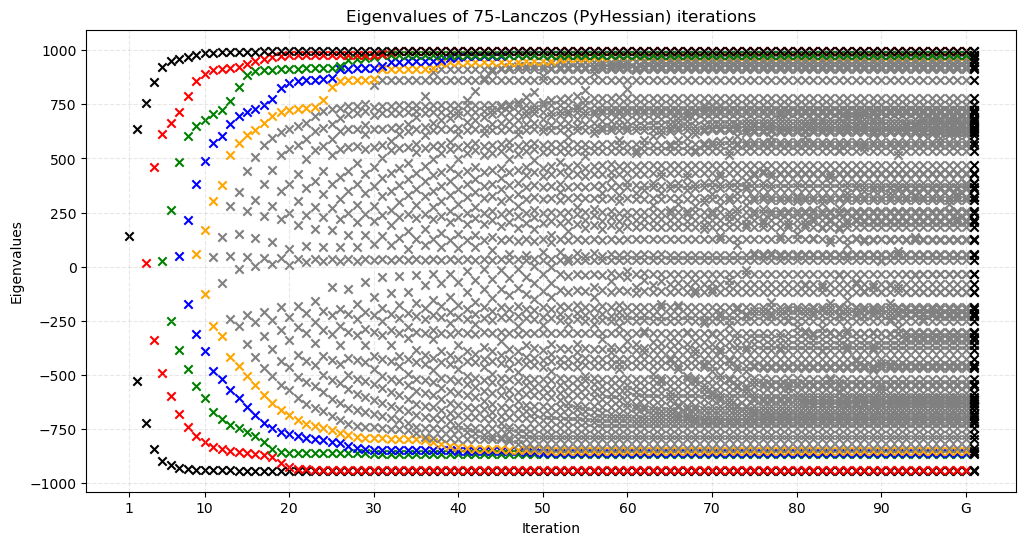

In [32]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=d_value_pyhessian)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_pyhessian}-Lanczos (PyHessian)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=d_value_pyhessian)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_pyhessian}-Lanczos (PyHessian)")

#### 15-Lanczos (Papyan's version)

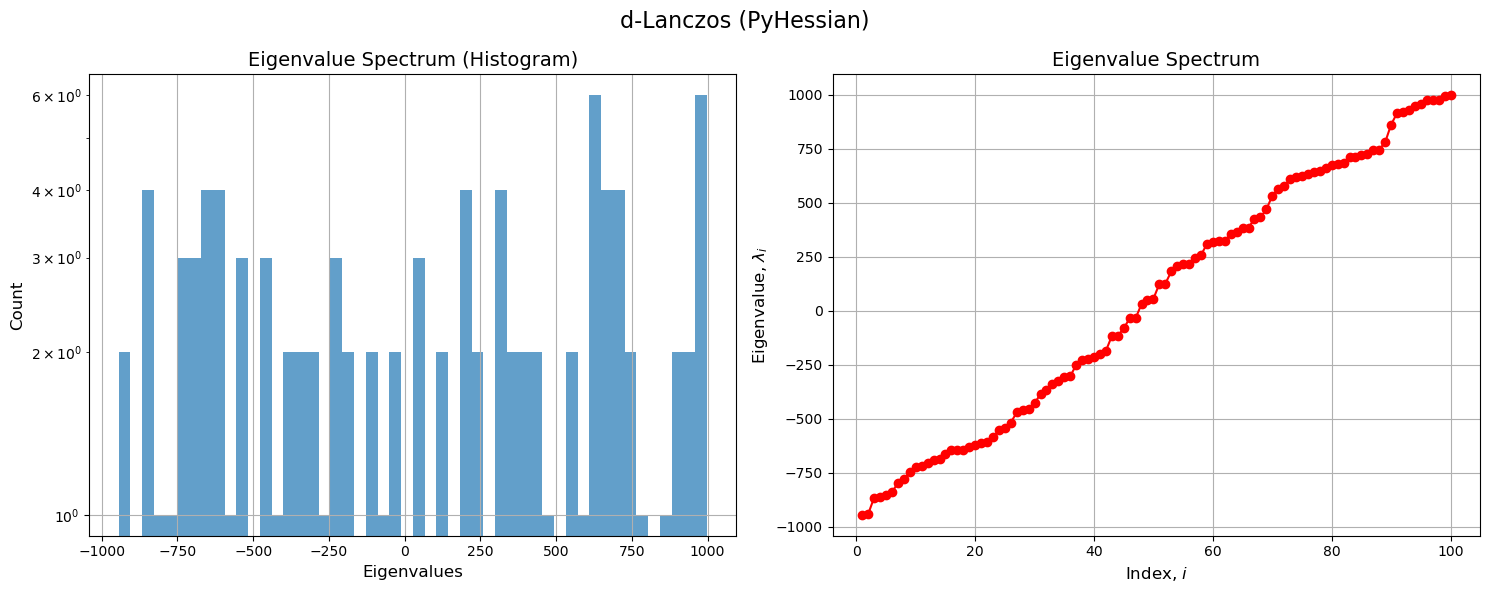

L2 distance: 0.24358005821704865


In [33]:
d_value_papyan = 75
eigenvalues_d_lanzcos_papyan, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_papyan(mtx_size, seed=seed, d=d_value_papyan)
plot_spectrum_combined(eigenvalues_d_lanzcos_papyan, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_papyan), 2)}")

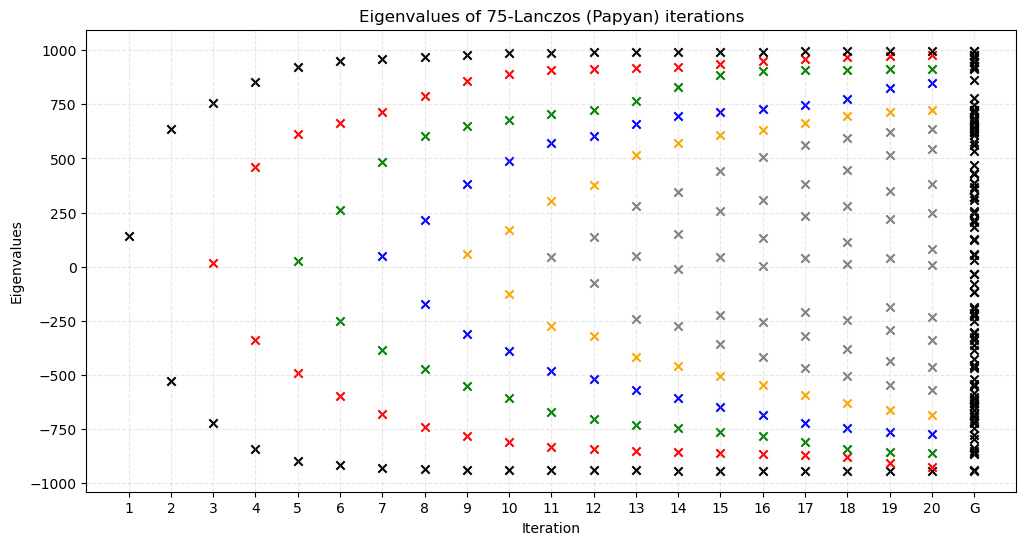

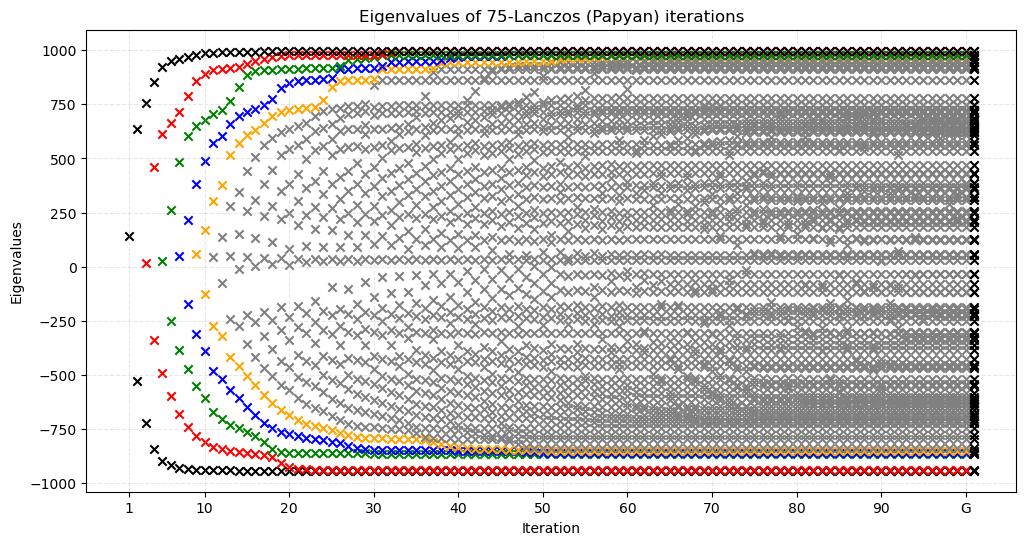

In [34]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_papyan(iter+1, seed=seed, d=d_value_papyan)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_papyan}-Lanczos (Papyan)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_papyan(iter+1, seed=seed, d=d_value_papyan)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_papyan}-Lanczos (Papyan)")

#### Compare eigenvalues obtained by different algorithms

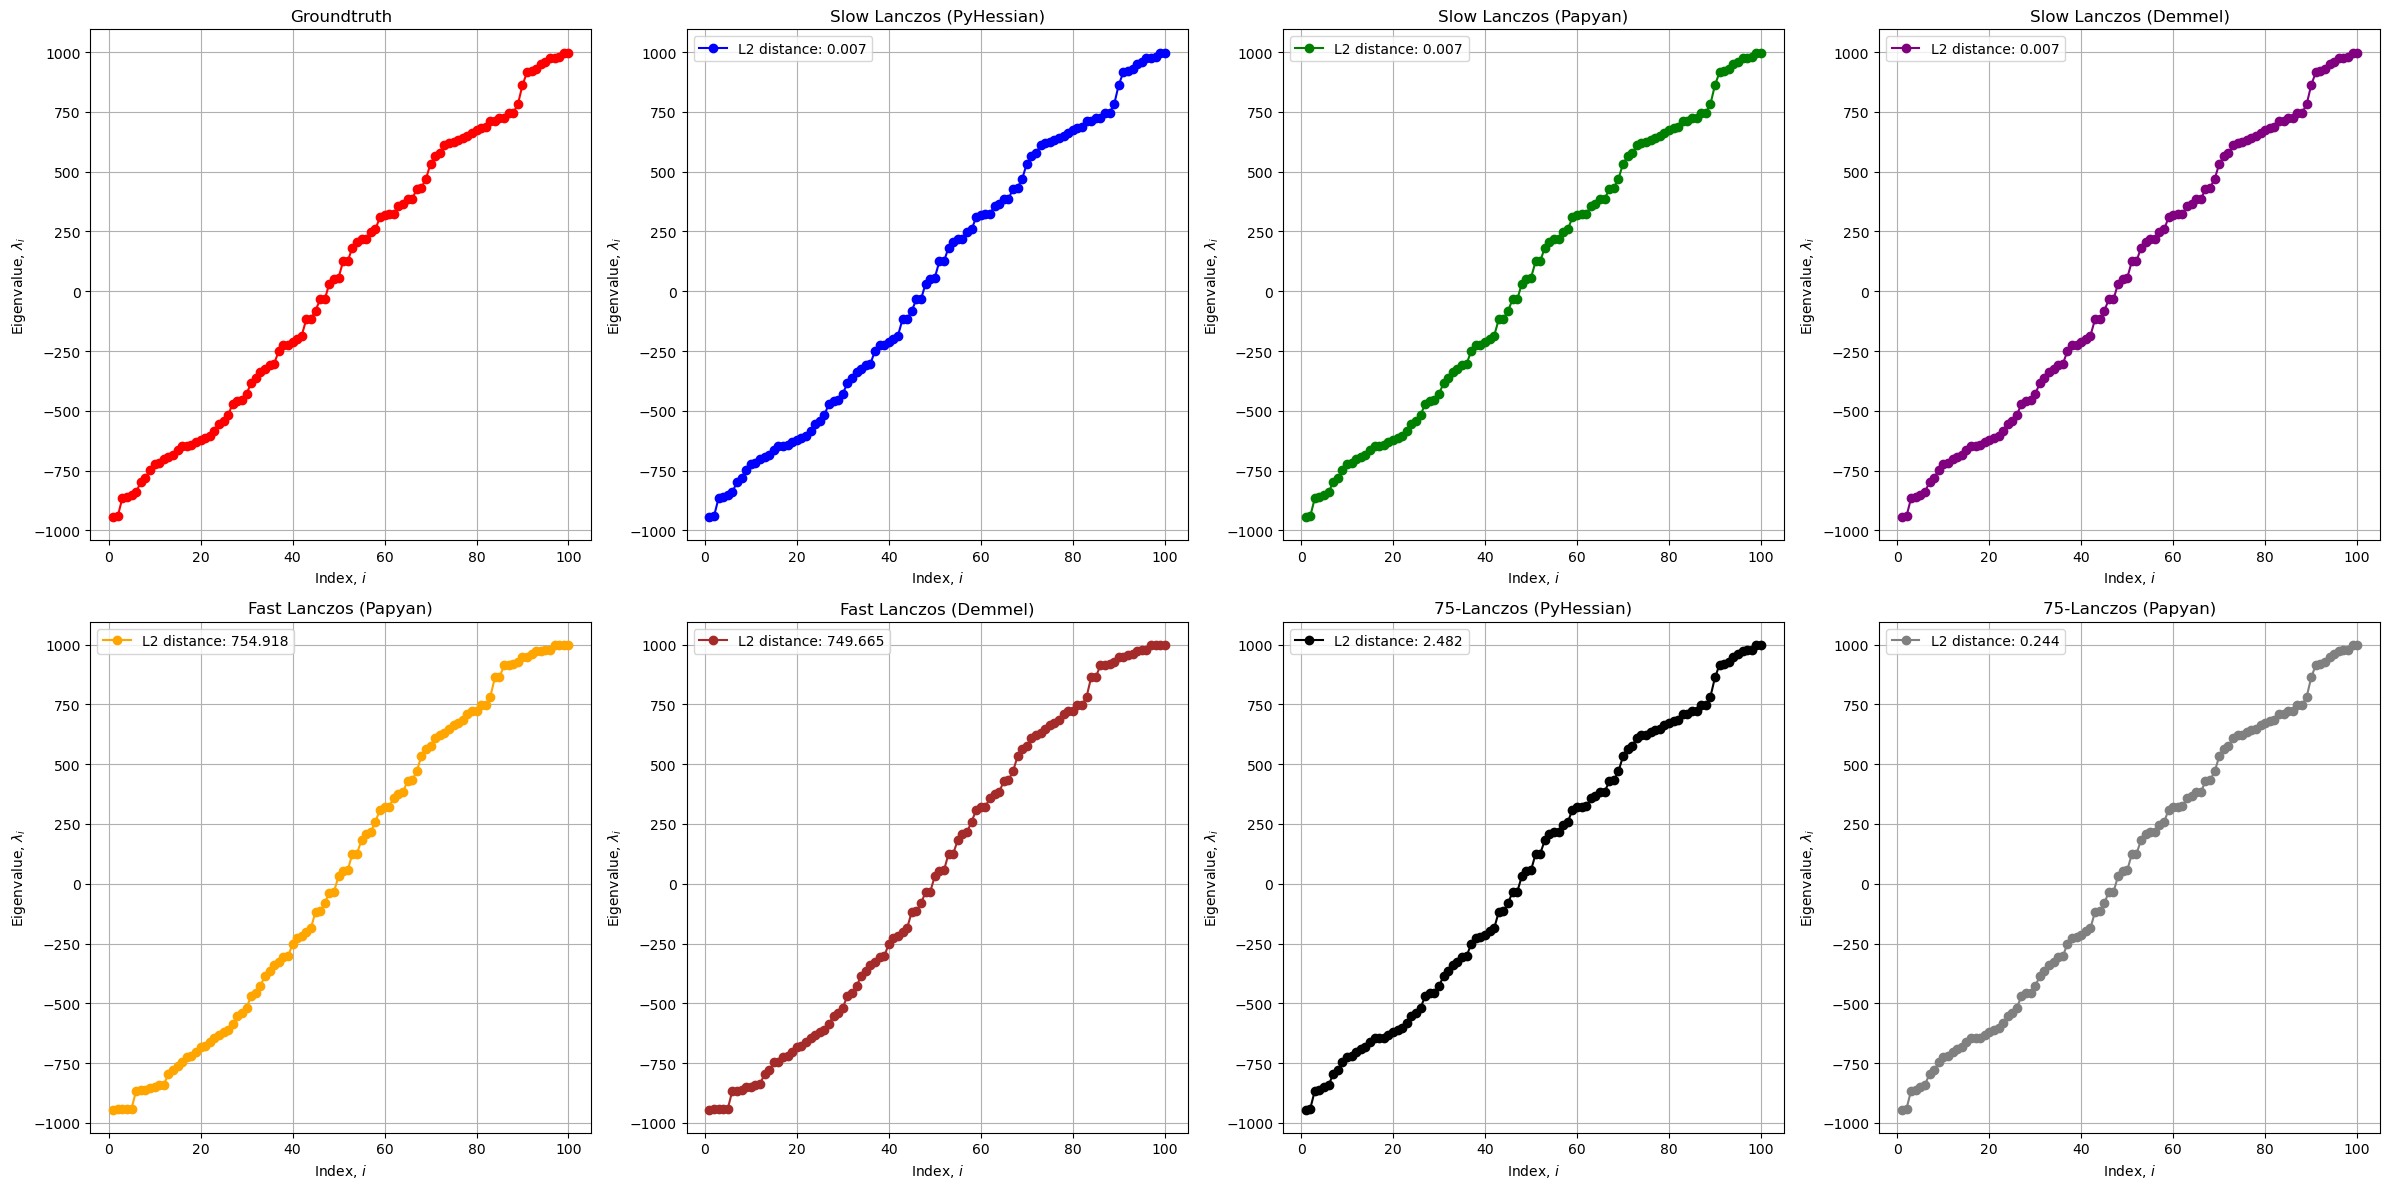

In [35]:
# convert to torch tensors
eigenvalues_slow_lanczos_pyhessian = torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian)
eigenvalues_slow_lanczos_papyan = torch.FloatTensor(eigenvalues_slow_lanczos_papyan)
eigenvalues_slow_lanczos_demmel = torch.FloatTensor(eigenvalues_slow_lanczos_demmel)
eigenvalues_fast_lanczos_papyan = torch.FloatTensor(eigenvalues_fast_lanczos_papyan)
eigenvalues_fast_lanczos_demmel = torch.FloatTensor(eigenvalues_fast_lanczos_demmel)
eigenvalues_d_lanzcos_pyhessian = torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian)
eigenvalues_d_lanzcos_papyan = torch.FloatTensor(eigenvalues_d_lanzcos_papyan)
# plot the eigenvalues
fig, ax = plt.subplots(2, 4, figsize=(24, 12))
x_indices = torch.arange(1, mtx_size+1)
# Groundtruth
ax[0, 0].plot(x_indices, torch.sort(eigenvalues).values, marker="o", linestyle="-", color="red")
ax[0, 0].set_xlabel(r"Index, $i$")
ax[0, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 0].set_title("Groundtruth")
ax[0, 0].grid(True)
# Slow Lanczos (PyHessian)
ax[0, 1].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_pyhessian).values, marker="o", linestyle="-", color="blue")
ax[0, 1].set_xlabel(r"Index, $i$")
ax[0, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 1].set_title("Slow Lanczos (PyHessian)")
ax[0, 1].grid(True)
ax[0, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2):.3f}"])
# Slow Lanczos (Papyan)
ax[0, 2].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_papyan).values, marker="o", linestyle="-", color="green")
ax[0, 2].set_xlabel(r"Index, $i$")
ax[0, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 2].set_title("Slow Lanczos (Papyan)")
ax[0, 2].grid(True)
ax[0, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2):.3f}"])
# Slow Lanczos (Demmel)
ax[0, 3].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_demmel).values, marker="o", linestyle="-", color="purple")
ax[0, 3].set_xlabel(r"Index, $i$")
ax[0, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 3].set_title("Slow Lanczos (Demmel)")
ax[0, 3].grid(True)
ax[0, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2):.3f}"])
# Fast Lanczos (Papyan)
ax[1, 0].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_papyan).values, marker="o", linestyle="-", color="orange")
ax[1, 0].set_xlabel(r"Index, $i$")
ax[1, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 0].set_title("Fast Lanczos (Papyan)")
ax[1, 0].grid(True)
ax[1, 0].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2):.3f}"])
# Fast Lanczos (Demmel)
ax[1, 1].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_demmel).values, marker="o", linestyle="-", color="brown")
ax[1, 1].set_xlabel(r"Index, $i$")
ax[1, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 1].set_title("Fast Lanczos (Demmel)")
ax[1, 1].grid(True)
ax[1, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 2].plot(x_indices, torch.sort(eigenvalues_d_lanzcos_pyhessian).values, marker="o", linestyle="-", color="black")
ax[1, 2].set_xlabel(r"Index, $i$")
ax[1, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 2].set_title(f"{d_value_pyhessian}-Lanczos (PyHessian)")
ax[1, 2].grid(True)
ax[1, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 3].plot(x_indices, torch.sort(eigenvalues_d_lanzcos_papyan).values, marker="o", linestyle="-", color="gray")
ax[1, 3].set_xlabel(r"Index, $i$")
ax[1, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 3].set_title(f"{d_value_papyan}-Lanczos (Papyan)")
ax[1, 3].grid(True)
ax[1, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_papyan), 2):.3f}"])
plt.tight_layout()
plt.show()

#### Compare $\alpha_k$ and $\beta_k$ obtained by different algorithms

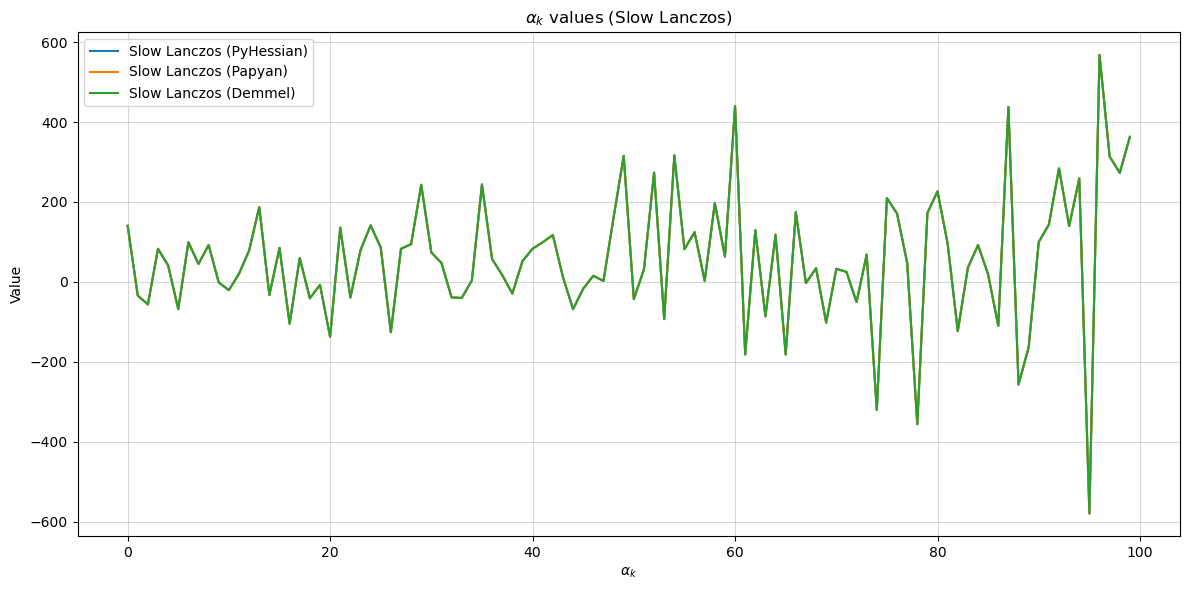

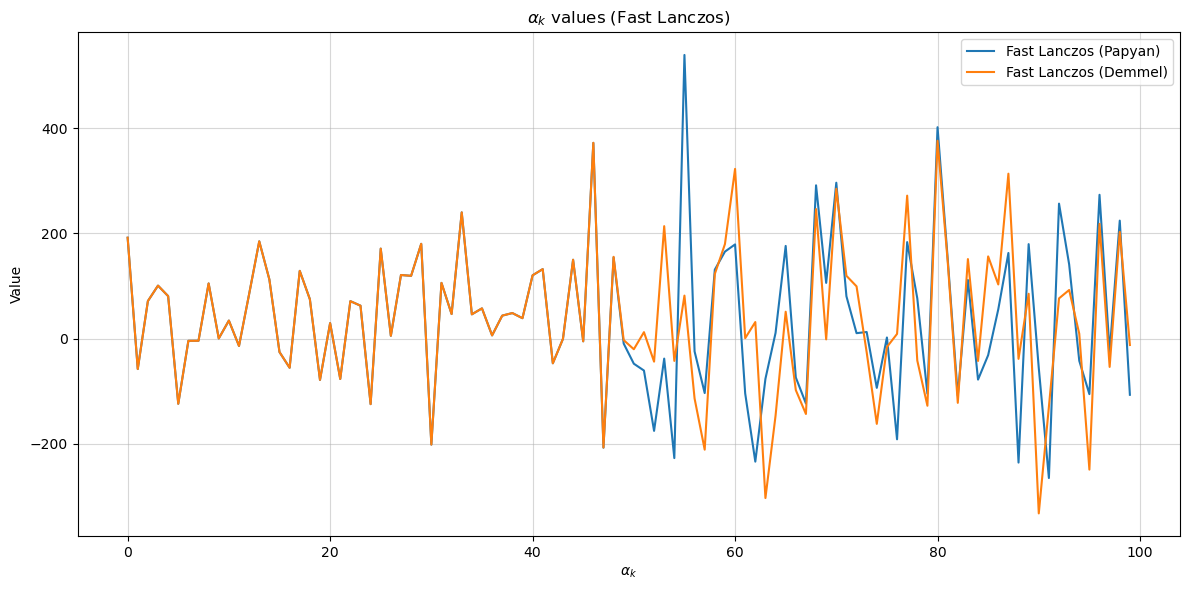

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(alpha_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(alpha_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Slow Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alpha_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(alpha_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Fast Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

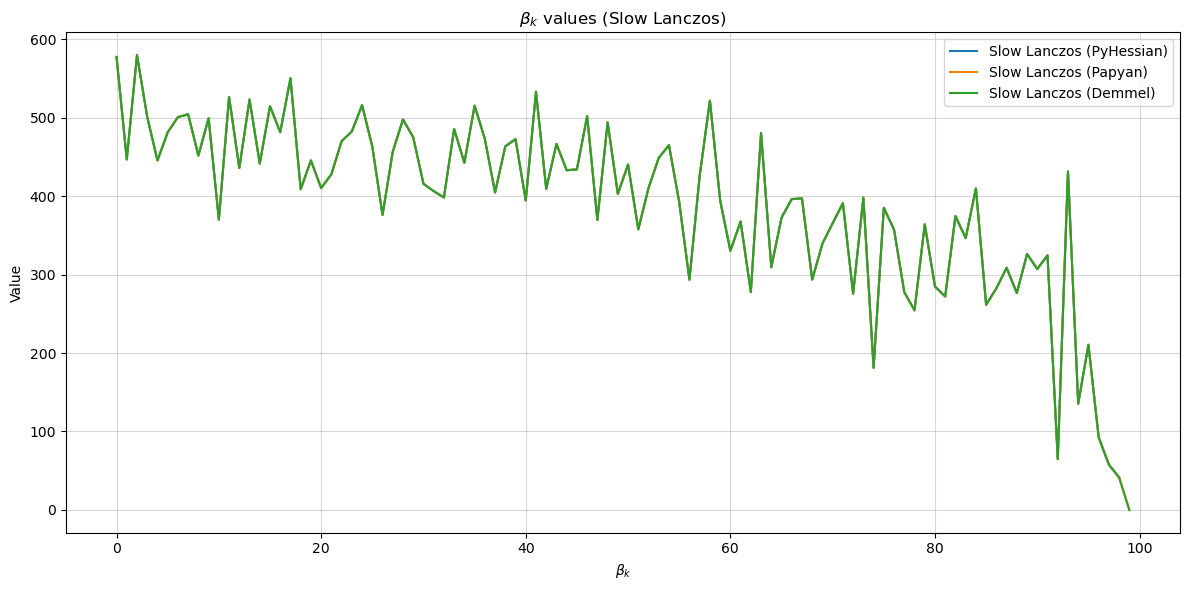

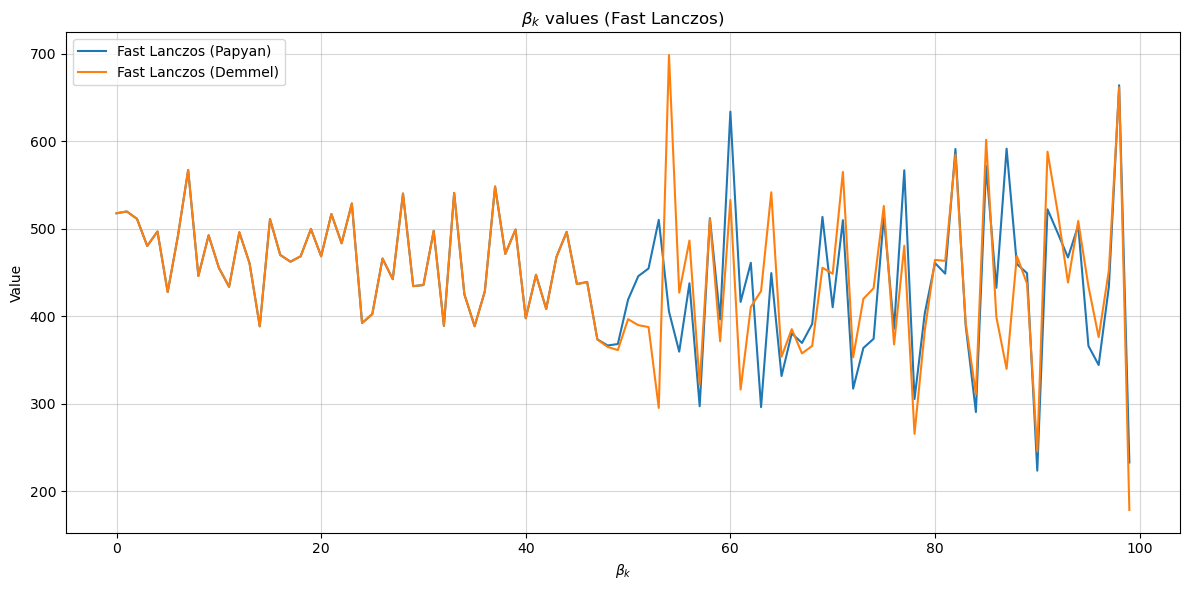

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(beta_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(beta_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(beta_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Slow Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(beta_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(beta_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Fast Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()